# Сборный Проект — 2. HR-аналитика

# Описание проекта

HR-аналитики компании «Работа с заботой» помогают бизнесу оптимизировать управление персоналом: бизнес предоставляет данные, а аналитики предлагают, как избежать финансовых потерь и оттока сотрудников. В этом HR-аналитикам пригодится машинное обучение, с помощью которого получится быстрее и точнее отвечать на вопросы бизнеса.  
Компания предоставила данные с характеристиками сотрудников компании. Среди них — уровень удовлетворённости сотрудника работой в компании. Эту информацию получили из форм обратной связи: сотрудники заполняют тест-опросник, и по его результатам рассчитывается доля их удовлетворённости от 0 до 1, где 0 — совершенно неудовлетворён, 1 — полностью удовлетворён.   
Собирать данные такими опросниками не так легко: компания большая, и всех сотрудников надо сначала оповестить об опросе, а затем проследить, что все его прошли. 
Первая задача — построить модель, которая сможет предсказать уровень удовлетворённости сотрудника на основе данных заказчика.   
Почему бизнесу это важно: удовлетворённость работой напрямую влияет на отток сотрудников. А предсказание оттока — одна из важнейших задач HR-аналитиков. Внезапные увольнения несут в себе риски для компании, особенно если уходит важный сотрудник.  
Вторая задача — построить модель, которая сможет на основе данных заказчика предсказать то, что сотрудник уволится из компании.  

# Задача 1: Предсказание уровня удовлетворённости сотрудника

Описание данных: 
  
id — уникальный идентификатор сотрудника;  
dept — отдел, в котором работает сотрудник;  
level — уровень занимаемой должности;  
workload — уровень загруженности сотрудника;  
employment_years — длительность работы в компании (в годах);  
last_year_promo — показывает, было ли повышение за последний год;  
last_year_violations — показывает, нарушал ли сотрудник трудовой договор за последний год;  
supervisor_evaluation — оценка качества работы сотрудника, которую дал руководитель;  
salary — ежемесячная зарплата сотрудника;  
job_satisfaction_rate — уровень удовлетворённости сотрудника работой в компании, целевой признак.

Ход работы:  
  
Загрузка данных  
Предобработка данных  
Исследовательский анализ данных  
Подготовка данных  
Обучение моделей  
Оформление выводов  

# Задача 2: Предсказание увольнения сотрудника из компании

Описание данных:  
  
Входные признаки те же, что и в предыдущей задаче. Однако целевой признак отличается: это quit — увольнение сотрудника из компании.

Ход работы:  
      
Загрузка данных\
Предобработка данных\
Исследовательский анализ данных\
Добавление нового входного признака\
Подготовка данных\
Обучение моделей\
Оформление выводов\
Написание общего вывода

# Задача 1

## Загрузка даных

In [1]:
!pip install phik -q
!pip install --upgrade scikit-learn -q
!pip install shap -q

In [2]:
import pandas as pd
import shap
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import phik
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler, MinMaxScaler, RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.metrics import roc_auc_score, make_scorer
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
RANDOM_STATE = 42

In [3]:
train = pd.read_csv('/datasets/train_job_satisfaction_rate.csv')
test_features = pd.read_csv('/datasets/test_features.csv')
test_target = pd.read_csv('/datasets/test_target_job_satisfaction_rate.csv')

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     4000 non-null   int64  
 1   dept                   3994 non-null   object 
 2   level                  3996 non-null   object 
 3   workload               4000 non-null   object 
 4   employment_years       4000 non-null   int64  
 5   last_year_promo        4000 non-null   object 
 6   last_year_violations   4000 non-null   object 
 7   supervisor_evaluation  4000 non-null   int64  
 8   salary                 4000 non-null   int64  
 9   job_satisfaction_rate  4000 non-null   float64
dtypes: float64(1), int64(4), object(5)
memory usage: 312.6+ KB


In [5]:
train.head()

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate
0,155278,sales,junior,medium,2,no,no,1,24000,0.58
1,653870,hr,junior,high,2,no,no,5,38400,0.76
2,184592,sales,junior,low,1,no,no,2,12000,0.11
3,171431,technology,junior,low,4,no,no,2,18000,0.37
4,693419,hr,junior,medium,1,no,no,3,22800,0.20


In [6]:
test_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     2000 non-null   int64 
 1   dept                   1998 non-null   object
 2   level                  1999 non-null   object
 3   workload               2000 non-null   object
 4   employment_years       2000 non-null   int64 
 5   last_year_promo        2000 non-null   object
 6   last_year_violations   2000 non-null   object
 7   supervisor_evaluation  2000 non-null   int64 
 8   salary                 2000 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 140.8+ KB


In [7]:
test_features.head()

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary
0,485046,marketing,junior,medium,2,no,no,5,28800
1,686555,hr,junior,medium,1,no,no,4,30000
2,467458,sales,middle,low,5,no,no,4,19200
3,418655,sales,middle,low,6,no,no,4,19200
4,789145,hr,middle,medium,5,no,no,5,40800


In [8]:
test_target.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     2000 non-null   int64  
 1   job_satisfaction_rate  2000 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 31.4 KB


In [9]:
test_target.head()

,id,job_satisfaction_rate
0,130604,0.74
1,825977,0.75
2,418490,0.60
3,555320,0.72
4,826430,0.08


Загрузили библиотеки и файлы, объявили константы.

## Предобработка данных

In [10]:
train.set_index('id', inplace=True)
test_features.set_index('id', inplace=True)
test_target.set_index('id', inplace=True)

In [11]:
train.head()

,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate
id,,,,,,,,,
155278,sales,junior,medium,2,no,no,1,24000,0.58
653870,hr,junior,high,2,no,no,5,38400,0.76
184592,sales,junior,low,1,no,no,2,12000,0.11
171431,technology,junior,low,4,no,no,2,18000,0.37
693419,hr,junior,medium,1,no,no,3,22800,0.20


In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4000 entries, 155278 to 338347
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dept                   3994 non-null   object 
 1   level                  3996 non-null   object 
 2   workload               4000 non-null   object 
 3   employment_years       4000 non-null   int64  
 4   last_year_promo        4000 non-null   object 
 5   last_year_violations   4000 non-null   object 
 6   supervisor_evaluation  4000 non-null   int64  
 7   salary                 4000 non-null   int64  
 8   job_satisfaction_rate  4000 non-null   float64
dtypes: float64(1), int64(3), object(5)
memory usage: 312.5+ KB


In [13]:
train.duplicated().sum()

245

In [14]:
train.drop_duplicates(inplace=True)

In [15]:
for i in train.select_dtypes(exclude='number').columns:
    print(i , train[i].unique())

dept ['sales' 'hr' 'technology' 'purchasing' 'marketing' nan]
level ['junior' 'middle' 'sinior' nan]
workload ['medium' 'high' 'low']
last_year_promo ['no' 'yes']
last_year_violations ['no' 'yes']


In [16]:
train['level'] = train['level'].str.replace('sinior', 'senior')

In [17]:
test_features.head()

,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary
id,,,,,,,,
485046,marketing,junior,medium,2,no,no,5,28800
686555,hr,junior,medium,1,no,no,4,30000
467458,sales,middle,low,5,no,no,4,19200
418655,sales,middle,low,6,no,no,4,19200
789145,hr,middle,medium,5,no,no,5,40800


In [18]:
test_features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 485046 to 771859
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   dept                   1998 non-null   object
 1   level                  1999 non-null   object
 2   workload               2000 non-null   object
 3   employment_years       2000 non-null   int64 
 4   last_year_promo        2000 non-null   object
 5   last_year_violations   2000 non-null   object
 6   supervisor_evaluation  2000 non-null   int64 
 7   salary                 2000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 140.6+ KB


In [19]:
for i in test_features.select_dtypes(exclude='number').columns:
    print(i , test_features[i].unique())

dept ['marketing' 'hr' 'sales' 'purchasing' 'technology' nan ' ']
level ['junior' 'middle' 'sinior' nan]
workload ['medium' 'low' 'high' ' ']
last_year_promo ['no' 'yes']
last_year_violations ['no' 'yes']


In [20]:
test_features['level'] = test_features['level'].str.replace('sinior', 'senior')

In [21]:
test_features.loc[test_features['dept'] == ' ', 'dept'] = np.nan

In [22]:
test_features.loc[test_features['workload'] == ' ', 'workload'] = np.nan

In [24]:
test_target.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 130604 to 648995
Data columns (total 1 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   job_satisfaction_rate  2000 non-null   float64
dtypes: float64(1)
memory usage: 31.2 KB


In [25]:
test = test_features.merge(test_target, on='id')

In [27]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 485046 to 771859
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dept                   1997 non-null   object 
 1   level                  1999 non-null   object 
 2   workload               1999 non-null   object 
 3   employment_years       2000 non-null   int64  
 4   last_year_promo        2000 non-null   object 
 5   last_year_violations   2000 non-null   object 
 6   supervisor_evaluation  2000 non-null   int64  
 7   salary                 2000 non-null   int64  
 8   job_satisfaction_rate  2000 non-null   float64
dtypes: float64(1), int64(3), object(5)
memory usage: 156.2+ KB


Проведена предобработка данных. В test_features и train sinior заменено на senior. Удалены дубликаты из train. Дубликаты в тестовых выборках удалять не будем, так как на качество обучения модели они не повлияют.

## Исследовательский анализ данных

In [28]:
train.head()

,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate
id,,,,,,,,,
155278,sales,junior,medium,2,no,no,1,24000,0.58
653870,hr,junior,high,2,no,no,5,38400,0.76
184592,sales,junior,low,1,no,no,2,12000,0.11
171431,technology,junior,low,4,no,no,2,18000,0.37
693419,hr,junior,medium,1,no,no,3,22800,0.20


In [29]:
train.describe()

,employment_years,supervisor_evaluation,salary,job_satisfaction_rate
count,3755.000000,3755.000000,3755.000000,3755.000000
mean,3.817044,3.463648,34457.416778,0.532554
std,2.557142,1.026265,15050.643870,0.226393
min,1.000000,1.000000,12000.000000,0.030000
25%,2.000000,3.000000,22800.000000,0.350000
50%,3.000000,4.000000,31200.000000,0.550000
75%,6.000000,4.000000,44400.000000,0.710000
max,10.000000,5.000000,98400.000000,1.000000


In [30]:
cat_columns = train.select_dtypes(exclude='number').columns.tolist()

In [31]:
cat_columns

['dept', 'level', 'workload', 'last_year_promo', 'last_year_violations']

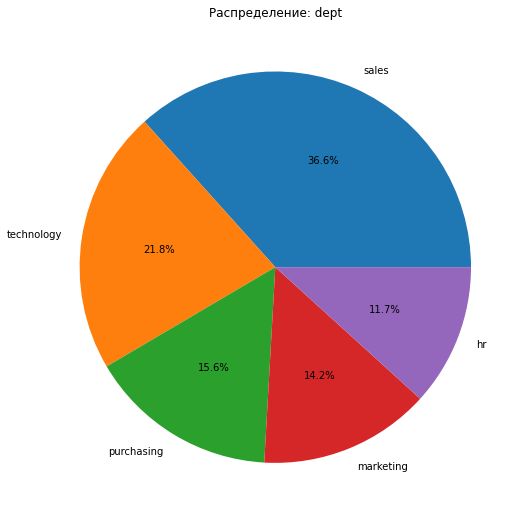

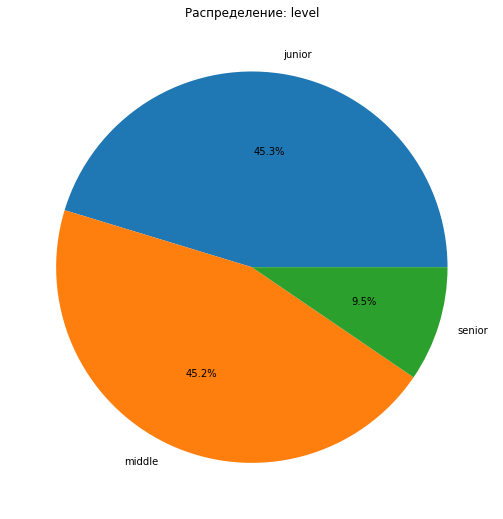

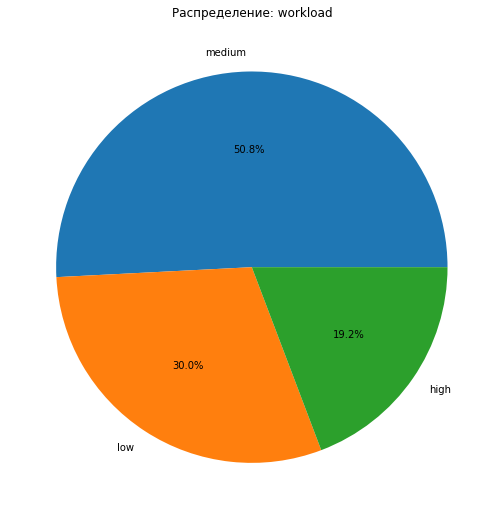

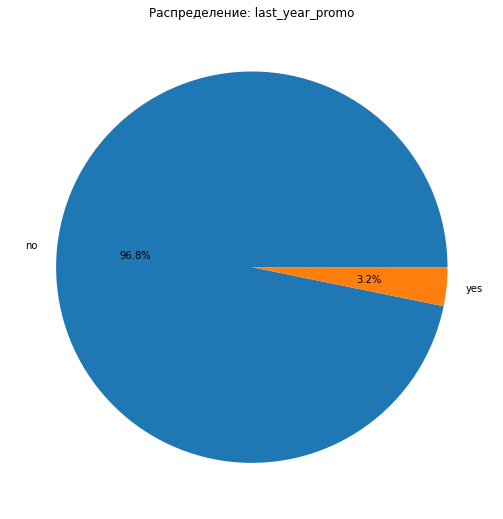

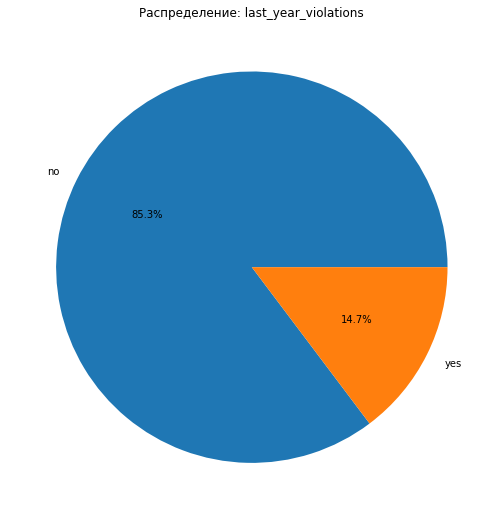

In [32]:
for i in cat_columns:
    plt.figure(figsize=(16, 9))
    train[i].value_counts().plot(kind='pie', autopct='%1.1f%%')
    plt.title(f'Распределение: {i}')
    plt.ylabel('')
    plt.show()

In [33]:
quant = ['employment_years','supervisor_evaluation']
quant_columns = ['salary','job_satisfaction_rate']

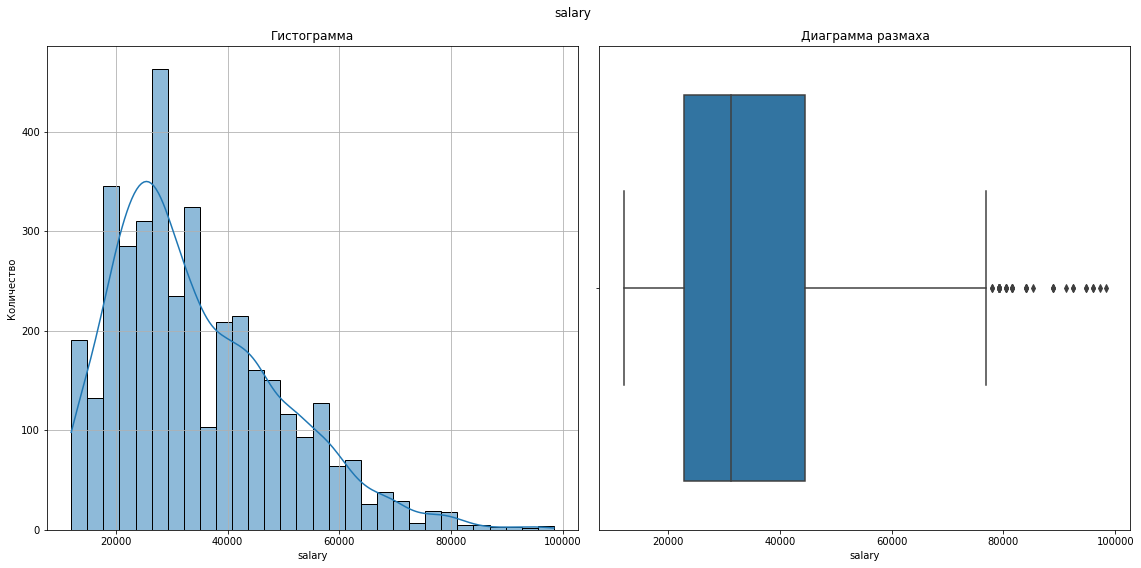

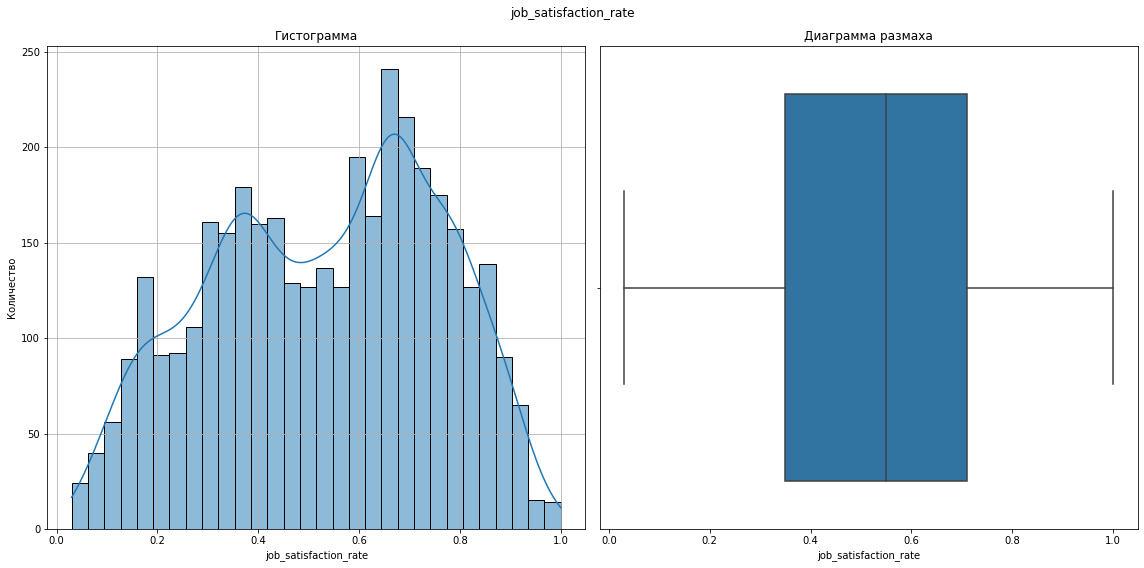

In [34]:
for i in quant_columns:
    fig, axs = plt.subplots(nrows= 1 , ncols= 2, figsize = (16,8))
    sns.histplot(data = train,x = i, ax=axs[0], bins = 30, kde=True)
    axs[0].set_xlabel(i)
    axs[0].set_ylabel('Количество')
    axs[0].set_title('Гистограмма')
    axs[0].grid(True)
    sns.boxplot(data = train,x = i, ax=axs[1])
    axs[1].set_xlabel(i)
    axs[1].set_title('Диаграмма размаха')
    fig.suptitle(i)
    plt.tight_layout()
    plt.show()

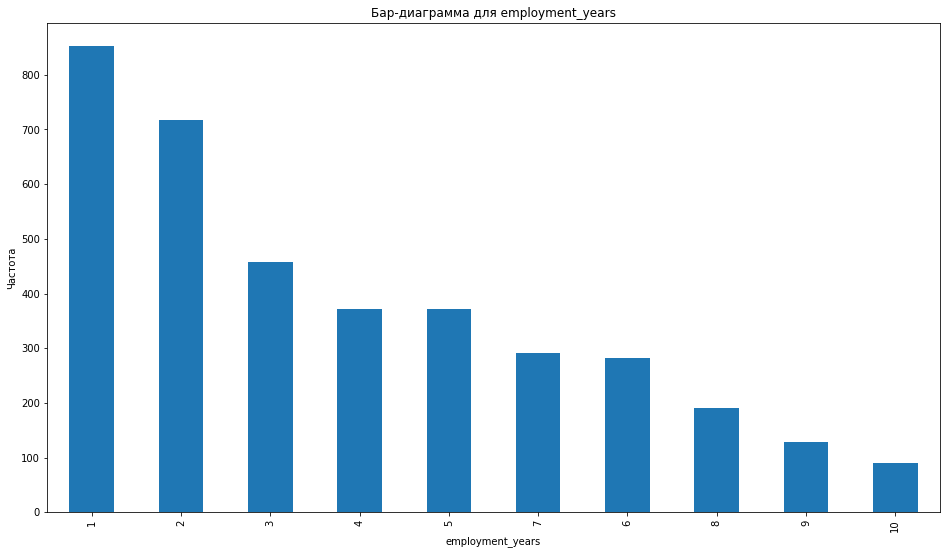

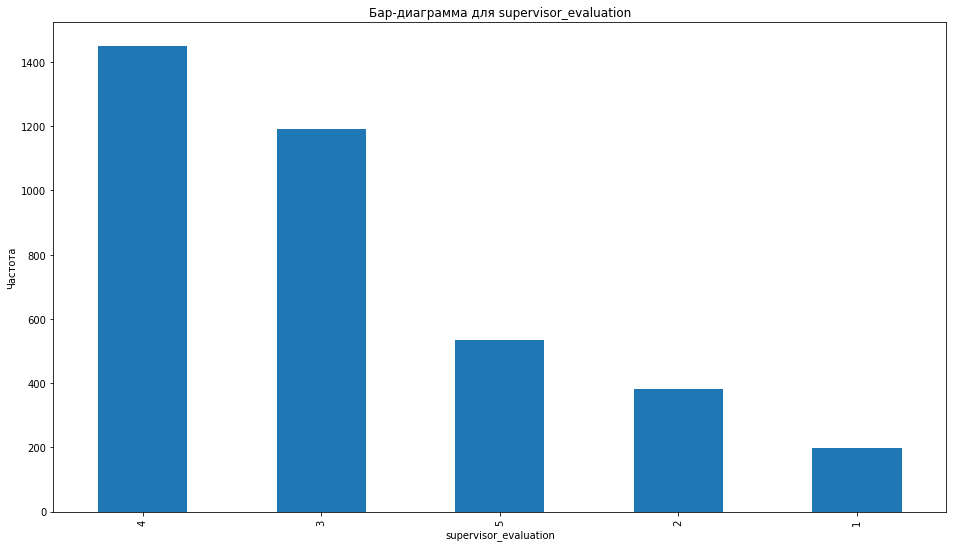

In [35]:
for i in quant:
    train[i].value_counts().plot(kind='bar', title=i, figsize=(16,9))
    plt.title(f'Бар-диаграмма для {i}')
    plt.xlabel(i)
    plt.ylabel('Частота')
    plt.show()

In [36]:
train.phik_matrix(interval_cols=['job_satisfaction_rate','salary'])\
.style.background_gradient(cmap ='coolwarm').set_precision(4)

,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate
dept,1.0000,0.0000,0.0181,0.0259,0.0000,0.0000,0.1006,0.2702,0.0747
level,0.0000,1.0000,0.4045,0.6755,0.1004,0.0000,0.0000,0.7144,0.0773
workload,0.0181,0.4045,1.0000,0.1659,0.0579,0.0000,0.0376,0.7853,0.0440
employment_years,0.0259,0.6755,0.1659,1.0000,0.1808,0.0438,0.0000,0.4700,0.3193
last_year_promo,0.0000,0.1004,0.0579,0.1808,1.0000,0.0113,0.0162,0.2112,0.1915
last_year_violations,0.0000,0.0000,0.0000,0.0438,0.0113,1.0000,0.1832,0.0000,0.5670
supervisor_evaluation,0.1006,0.0000,0.0376,0.0000,0.0162,0.1832,1.0000,0.0000,0.7630
salary,0.2702,0.7144,0.7853,0.4700,0.2112,0.0000,0.0000,1.0000,0.1496
job_satisfaction_rate,0.0747,0.0773,0.0440,0.3193,0.1915,0.5670,0.7630,0.1496,1.0000


In [37]:
test.head()

,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate
id,,,,,,,,,
485046,marketing,junior,medium,2,no,no,5,28800,0.79
686555,hr,junior,medium,1,no,no,4,30000,0.72
467458,sales,middle,low,5,no,no,4,19200,0.64
418655,sales,middle,low,6,no,no,4,19200,0.60
789145,hr,middle,medium,5,no,no,5,40800,0.75


In [38]:
test.describe()

,employment_years,supervisor_evaluation,salary,job_satisfaction_rate
count,2000.000000,2000.000000,2000.000000,2000.00000
mean,3.666500,3.526500,34066.800000,0.54878
std,2.537222,0.996892,15398.436729,0.22011
min,1.000000,1.000000,12000.000000,0.03000
25%,1.000000,3.000000,22800.000000,0.38000
50%,3.000000,4.000000,30000.000000,0.58000
75%,6.000000,4.000000,43200.000000,0.72000
max,10.000000,5.000000,96000.000000,1.00000


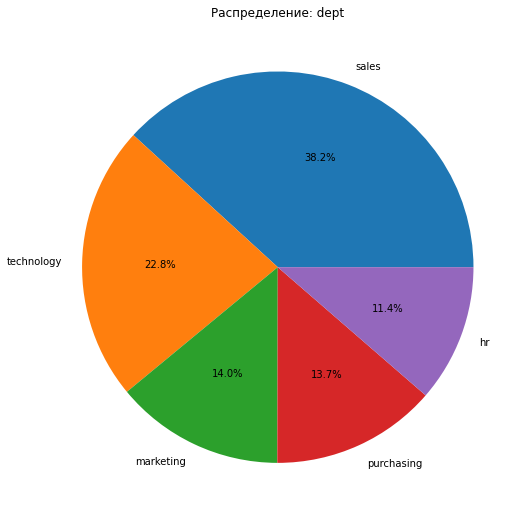

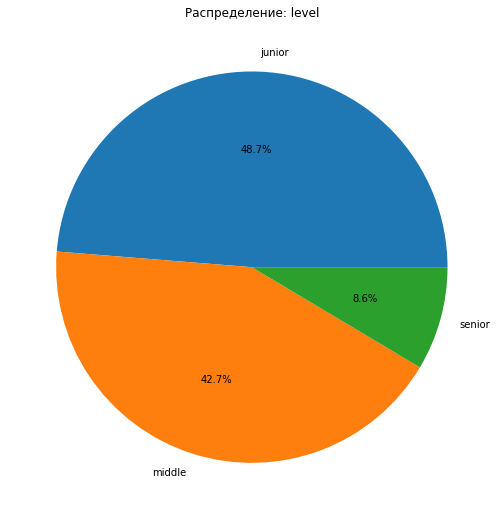

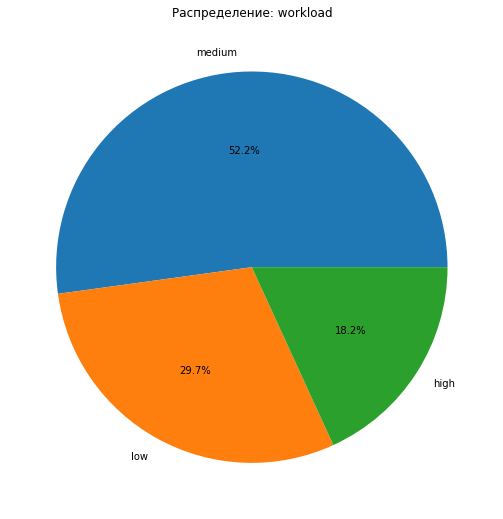

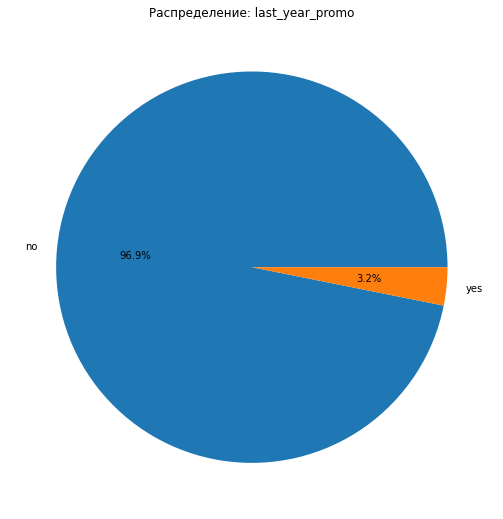

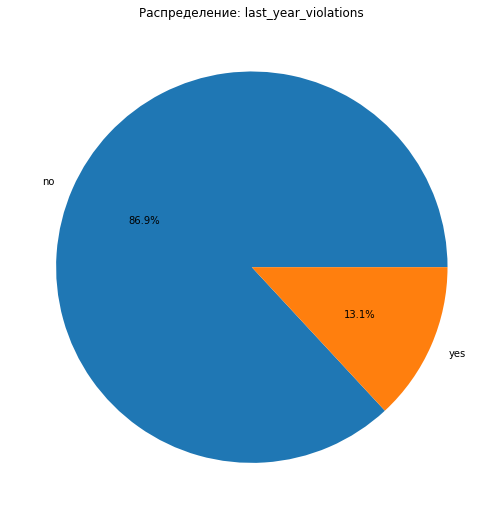

In [39]:
for i in cat_columns:
    plt.figure(figsize=(16, 9))
    test[i].value_counts().plot(kind='pie', autopct='%1.1f%%')
    plt.title(f'Распределение: {i}')
    plt.ylabel('')
    plt.show()

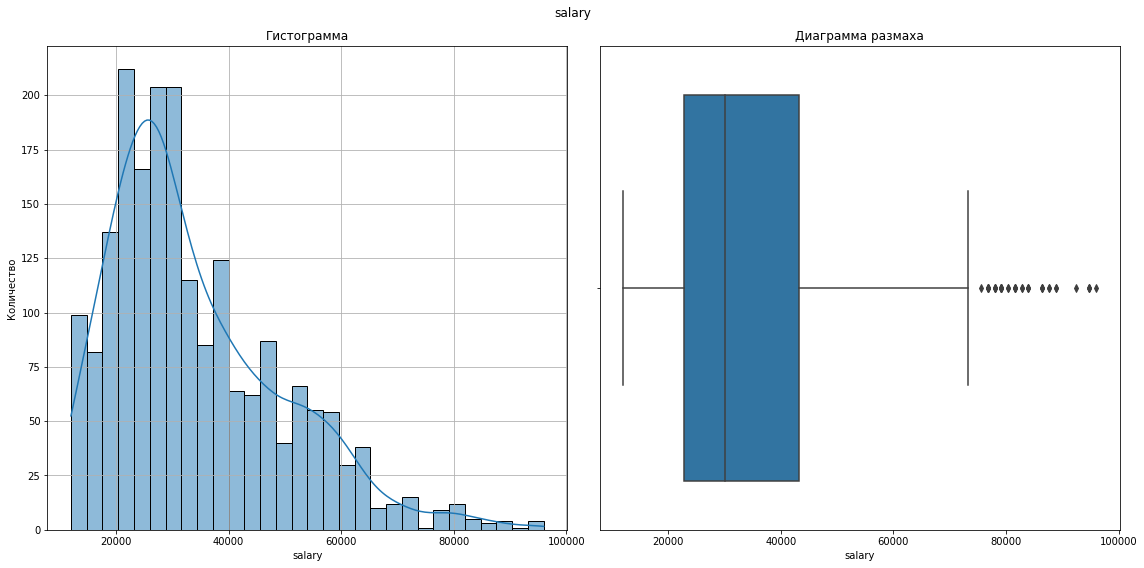

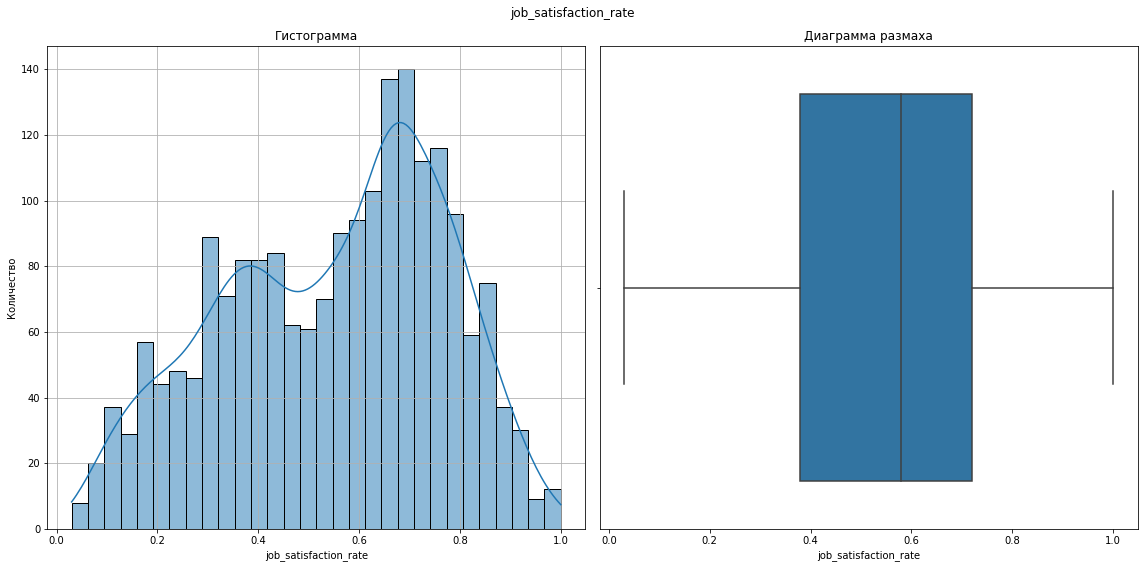

In [40]:
for i in quant_columns:
    fig, axs = plt.subplots(nrows= 1 , ncols= 2, figsize = (16,8))
    sns.histplot(data = test,x = i, ax=axs[0], bins = 30, kde=True)
    axs[0].set_xlabel(i)
    axs[0].set_ylabel('Количество')
    axs[0].set_title('Гистограмма')
    axs[0].grid(True)
    sns.boxplot(data = test,x = i, ax=axs[1])
    axs[1].set_xlabel(i)
    axs[1].set_title('Диаграмма размаха')
    fig.suptitle(i)
    plt.tight_layout()
    plt.show()

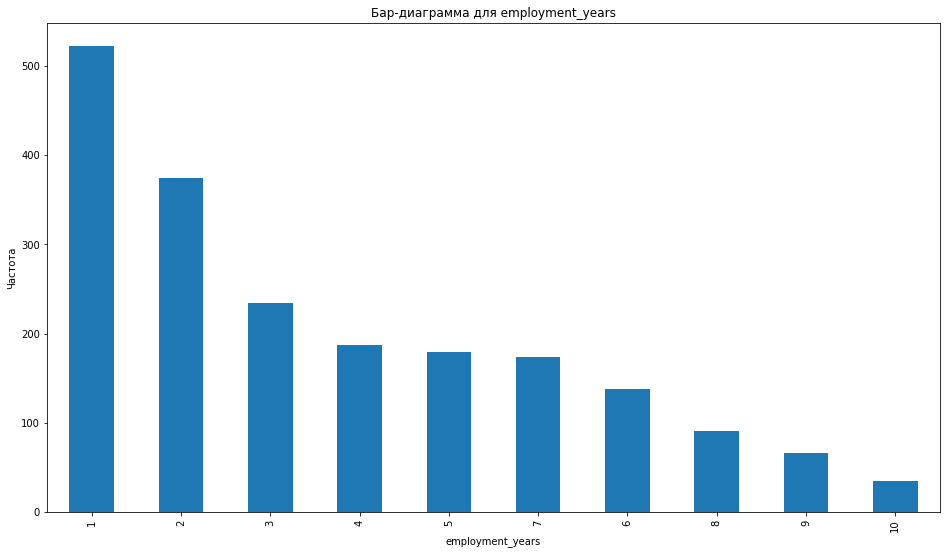

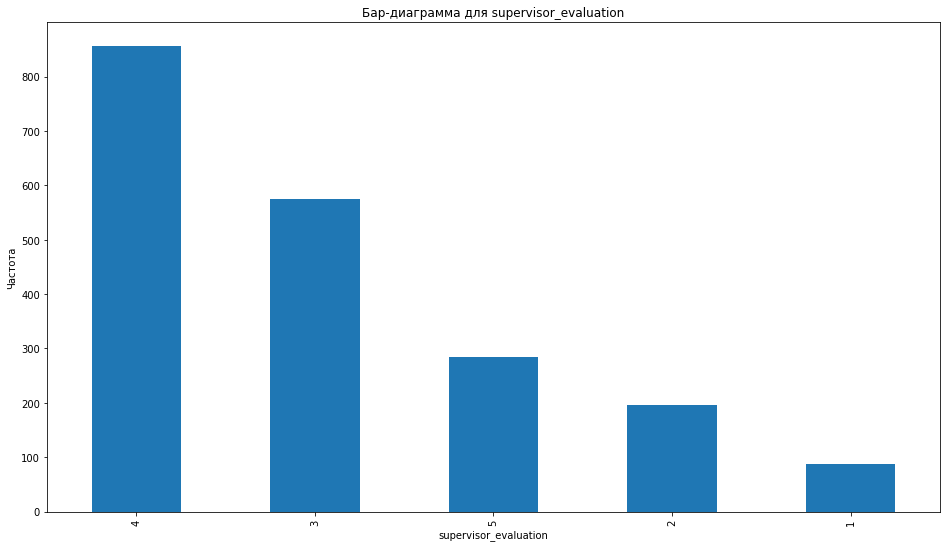

In [41]:
for i in quant:
    test[i].value_counts().plot(kind='bar', title=i, figsize=(16,9))
    plt.title(f'Бар-диаграмма для {i}')
    plt.xlabel(i)
    plt.ylabel('Частота')
    plt.show()

In [42]:
test.phik_matrix(interval_cols=['job_satisfaction_rate','salary'])\
.style.background_gradient(cmap ='coolwarm').set_precision(4)

,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate
dept,1.0000,0.0000,0.0339,0.0000,0.0000,0.0000,0.0609,0.3304,0.0758
level,0.0000,1.0000,0.4742,0.6897,0.1183,0.0175,0.0000,0.7490,0.0957
workload,0.0339,0.4742,1.0000,0.2022,0.0356,0.0000,0.0364,0.7858,0.0523
employment_years,0.0000,0.6897,0.2022,1.0000,0.1736,0.0664,0.0000,0.4947,0.3135
last_year_promo,0.0000,0.1183,0.0356,0.1736,1.0000,0.0000,0.0117,0.1937,0.3370
last_year_violations,0.0000,0.0175,0.0000,0.0664,0.0000,1.0000,0.1897,0.0000,0.5548
supervisor_evaluation,0.0609,0.0000,0.0364,0.0000,0.0117,0.1897,1.0000,0.1146,0.7699
salary,0.3304,0.7490,0.7858,0.4947,0.1937,0.0000,0.1146,1.0000,0.1719
job_satisfaction_rate,0.0758,0.0957,0.0523,0.3135,0.3370,0.5548,0.7699,0.1719,1.0000


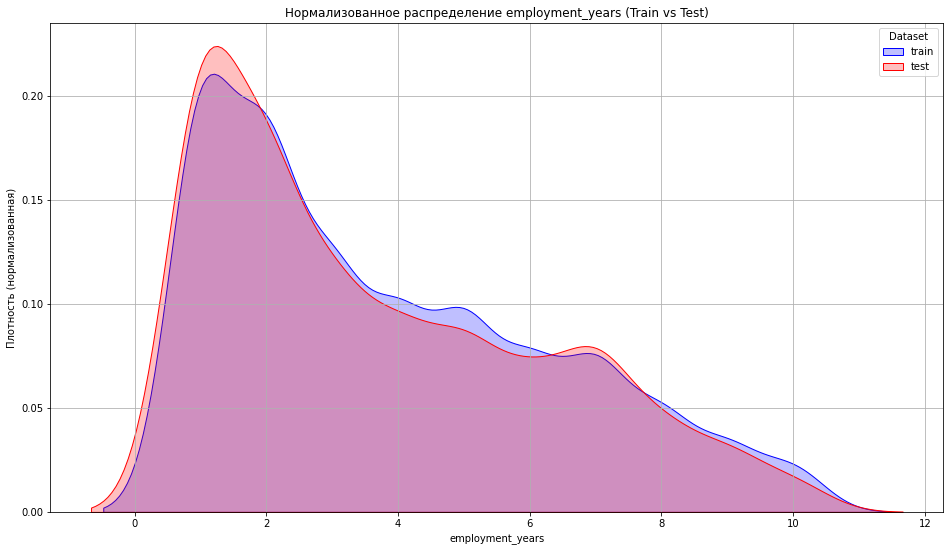

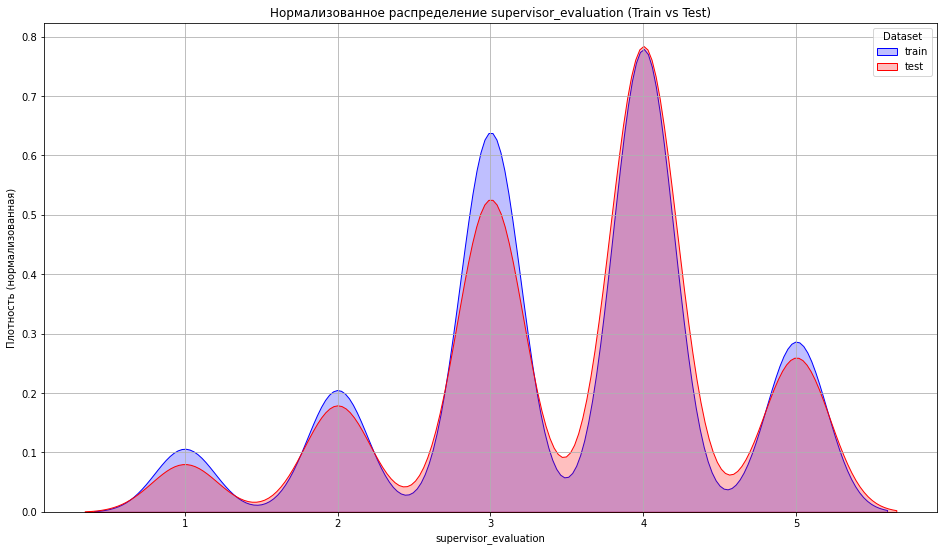

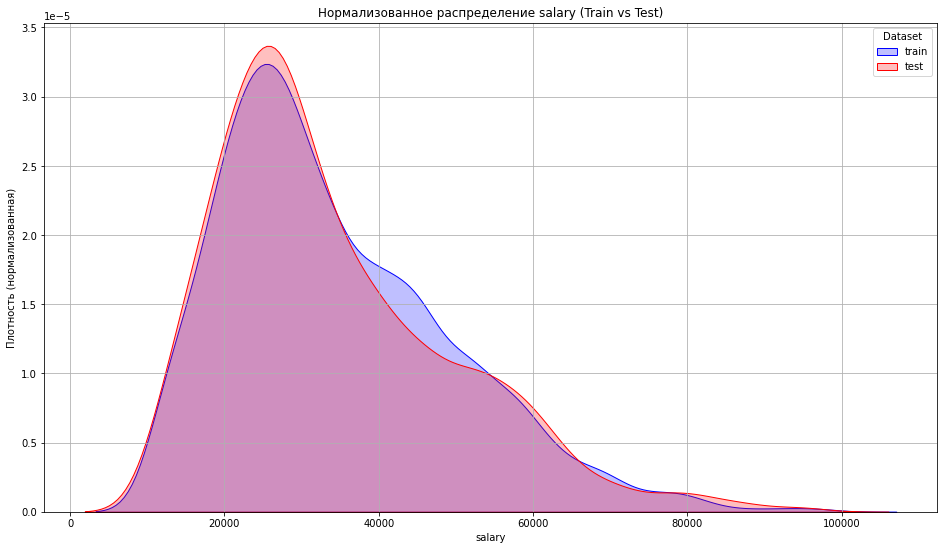

In [43]:
columns_to_plot = ['employment_years', 'supervisor_evaluation', 'salary']
for column in columns_to_plot:
    plt.figure(figsize=(16, 9))  
    sns.kdeplot(train[column], label='train', color='blue', fill=True, common_norm=False)
    sns.kdeplot(test[column], label='test', color='red', fill=True, common_norm=False)
    plt.title(f'Нормализованное распределение {column} (Train vs Test)')
    plt.xlabel(column)
    plt.ylabel('Плотность (нормализованная)')
    plt.legend(title='Dataset')
    plt.grid(True)
    plt.show()

Были построены графики для всех количественных и категориальных признаков для каждого датасета. Так же были проанализированы минимальные, максимальные, средние и медианные значения для каждого из количественных признаков, изучено соотношение для категориальных признаков. Самыми большими оказались отделы sales и technology. Практически все работники имеют уровень junior или middle, senior-специалистов в компании меньше 10%. Примерно 50% сотрудников имеют средний уровень загруженности. Повышение в последний год получало около 3% сотрудников. В оценке качества работы сотрудника, которую дал руководитель преобладают 4 и 3. Выбросов и аномалий в данных не обнаружено. Мультиколлинеарность так же отсутствует. Тренировочная и тестовая выборка имеют схожие распределения.

## Подготовка данных

In [44]:
train.head(10)

,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate
id,,,,,,,,,
155278,sales,junior,medium,2,no,no,1,24000,0.58
653870,hr,junior,high,2,no,no,5,38400,0.76
184592,sales,junior,low,1,no,no,2,12000,0.11
171431,technology,junior,low,4,no,no,2,18000,0.37
693419,hr,junior,medium,1,no,no,3,22800,0.20
405448,hr,middle,low,7,no,no,4,30000,0.78
857135,sales,senior,medium,9,no,no,3,56400,0.56
400657,purchasing,middle,high,9,no,no,3,52800,0.44
198846,hr,junior,low,1,no,no,2,13200,0.14


In [45]:
ohe_columns = ['dept','last_year_promo','last_year_violations']
ord_columns = ['level','workload']
num_columns = ['employment_years','supervisor_evaluation','salary']

In [46]:
X = train.drop('job_satisfaction_rate',axis=1)
y = train['job_satisfaction_rate']

In [47]:
ohe_pipe = Pipeline(
    [
        (
            'simpleImputer_ohe', 
            SimpleImputer(missing_values=np.nan, strategy='most_frequent')
        ),
        (
            'ohe', 
            OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False)
        )
    ]
) 

In [48]:
ord_pipe = Pipeline(
    [('simpleImputer_before_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
     ('ord',  OrdinalEncoder(
                categories=[
                    ['junior', 'middle','senior'],
                    ['low','medium','high']
                ], 
                handle_unknown='use_encoded_value', unknown_value=np.nan
            )
        ),
     ('simpleImputer_after_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent'))
    ]
)

In [49]:
data_preprocessor = ColumnTransformer(
    [('ohe', ohe_pipe, ohe_columns),
     ('ord', ord_pipe, ord_columns),
     ('num', MinMaxScaler(), num_columns)
    ], 
    remainder='passthrough'
)

Были написаны пайплайны для подготовки признаков. 

## Обучение моделей


In [50]:
#создаем метрику SMAPE («симметричное среднее абсолютное процентное отклонение»)
def smape_score(y_true, y_pred):
    return 100/len(y_true) * np.sum(np.abs(y_true-y_pred)/((np.abs(y_true) + np.abs(y_pred))/2))

smape_scorer = make_scorer(smape_score, greater_is_better = False)

In [51]:
pipe_final = Pipeline([
    ('preprocessor', data_preprocessor),
    ('models', LinearRegression())
])

In [52]:
param_grid = [
    # словарь для модели DecisionTreeRegressor
    {
        'models': [DecisionTreeRegressor(random_state=RANDOM_STATE)], 
        'models__min_samples_leaf': range(2,20),
        'models__min_samples_split': range(2,5),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), RobustScaler(), 'passthrough']  
    },
    
    # словарь для модели LinearRegression
    {
        'models': [LinearRegression()],
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), RobustScaler(), 'passthrough']   
    }
]

In [53]:
%%time
randomized_search = RandomizedSearchCV(
    pipe_final, 
    param_grid, 
    cv=5,
    n_iter=100,
    scoring=smape_scorer,
    random_state=RANDOM_STATE,
    n_jobs=-1,
    verbose=10
)
randomized_search.fit(X, y)
print('Лучшая модель и её параметры:\n\n', randomized_search.best_estimator_)
print ('Метрика лучшей модели на кросс-валидации:', -randomized_search.best_score_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV 1/5; 1/100] START models=DecisionTreeRegressor(random_state=42), models__min_samples_leaf=13, models__min_samples_split=2, preprocessor__num=StandardScaler()
[CV 1/5; 1/100] END models=DecisionTreeRegressor(random_state=42), models__min_samples_leaf=13, models__min_samples_split=2, preprocessor__num=StandardScaler();, score=-16.952 total time=   0.1s
[CV 2/5; 1/100] START models=DecisionTreeRegressor(random_state=42), models__min_samples_leaf=13, models__min_samples_split=2, preprocessor__num=StandardScaler()
[CV 2/5; 1/100] END models=DecisionTreeRegressor(random_state=42), models__min_samples_leaf=13, models__min_samples_split=2, preprocessor__num=StandardScaler();, score=-14.922 total time=   0.0s
[CV 3/5; 1/100] START models=DecisionTreeRegressor(random_state=42), models__min_samples_leaf=13, models__min_samples_split=2, preprocessor__num=StandardScaler()
[CV 3/5; 1/100] END models=DecisionTreeRegressor(random_state

In [54]:
pd.set_option('display.max_colwidth', None)
pd.DataFrame(randomized_search.cv_results_)[
    ['params', 'std_test_score', 'param_models', 'mean_test_score']
].sort_values('mean_test_score', ascending=False).head(3)

,params,std_test_score,param_models,mean_test_score
27,"{'preprocessor__num': StandardScaler(), 'models__min_samples_split': 3, 'models__min_samples_leaf': 3, 'models': DecisionTreeRegressor(random_state=42)}",0.636109,DecisionTreeRegressor(random_state=42),-15.268241
72,"{'preprocessor__num': StandardScaler(), 'models__min_samples_split': 2, 'models__min_samples_leaf': 3, 'models': DecisionTreeRegressor(random_state=42)}",0.636109,DecisionTreeRegressor(random_state=42),-15.268241
56,"{'preprocessor__num': 'passthrough', 'models__min_samples_split': 3, 'models__min_samples_leaf': 3, 'models': DecisionTreeRegressor(random_state=42)}",0.627983,DecisionTreeRegressor(random_state=42),-15.273424


In [55]:
X_test = test.drop('job_satisfaction_rate', axis=1)
y_test = test['job_satisfaction_rate']

In [56]:
y_pred = randomized_search.predict(X_test)

In [57]:
smape_score(y_test, y_pred)

13.475688575622549

Значение метрики меньше 15, а значит модель справляется с поставленной задачей.

# Промежуточный вывод

На данном шаге были использованы пайплайны. В качестве метрики была использована SMAPE. На RandomizedSearchCV было проведено 100 итераций с различными гиперпараметрами и среди моделей (DecisionTreeRegressor, LinearRegression) лучшей стала DecisionTreeRegressor с min_samples_leaf=3, min_samples_split=3, StandardScaler, значение SMAPE на кросс-валидации 15.26. На тестовых же данных модель продемонстрировала значение метрики равное 13.47, что соответствует условиям задачи(SMAPE<15).

# Задача 2

## Загрузка даных

In [58]:
train = pd.read_csv('/datasets/train_quit.csv')
test_features = pd.read_csv('/datasets/test_features.csv')
test_target = pd.read_csv('/datasets/test_target_quit.csv')

In [59]:
train.head()

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,quit
0,723290,sales,middle,high,2,no,no,4,54000,no
1,814010,sales,junior,medium,2,no,no,4,27600,no
2,155091,purchasing,middle,medium,5,no,no,1,37200,no
3,257132,sales,junior,medium,2,no,yes,3,24000,yes
4,910140,marketing,junior,medium,2,no,no,5,25200,no


In [60]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     4000 non-null   int64 
 1   dept                   4000 non-null   object
 2   level                  4000 non-null   object
 3   workload               4000 non-null   object
 4   employment_years       4000 non-null   int64 
 5   last_year_promo        4000 non-null   object
 6   last_year_violations   4000 non-null   object
 7   supervisor_evaluation  4000 non-null   int64 
 8   salary                 4000 non-null   int64 
 9   quit                   4000 non-null   object
dtypes: int64(4), object(6)
memory usage: 312.6+ KB


In [61]:
test_features.head()

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary
0,485046,marketing,junior,medium,2,no,no,5,28800
1,686555,hr,junior,medium,1,no,no,4,30000
2,467458,sales,middle,low,5,no,no,4,19200
3,418655,sales,middle,low,6,no,no,4,19200
4,789145,hr,middle,medium,5,no,no,5,40800


In [62]:
test_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     2000 non-null   int64 
 1   dept                   1998 non-null   object
 2   level                  1999 non-null   object
 3   workload               2000 non-null   object
 4   employment_years       2000 non-null   int64 
 5   last_year_promo        2000 non-null   object
 6   last_year_violations   2000 non-null   object
 7   supervisor_evaluation  2000 non-null   int64 
 8   salary                 2000 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 140.8+ KB


In [63]:
test_target.head()

,id,quit
0,999029,yes
1,372846,no
2,726767,no
3,490105,no
4,416898,yes


In [64]:
test_target.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2000 non-null   int64 
 1   quit    2000 non-null   object
dtypes: int64(1), object(1)
memory usage: 31.4+ KB


Загрузили файлы и провели их первичное изучение.

## Предобработка данных

In [65]:
train.set_index('id', inplace=True)
test_features.set_index('id', inplace=True)
test_target.set_index('id', inplace=True)

In [66]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4000 entries, 723290 to 853842
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   dept                   4000 non-null   object
 1   level                  4000 non-null   object
 2   workload               4000 non-null   object
 3   employment_years       4000 non-null   int64 
 4   last_year_promo        4000 non-null   object
 5   last_year_violations   4000 non-null   object
 6   supervisor_evaluation  4000 non-null   int64 
 7   salary                 4000 non-null   int64 
 8   quit                   4000 non-null   object
dtypes: int64(3), object(6)
memory usage: 312.5+ KB


In [67]:
train.duplicated().sum()

1413

In [68]:
train.drop_duplicates(inplace=True)

In [69]:
for i in train.select_dtypes(exclude='number').columns:
    print(i , train[i].unique())

dept ['sales' 'purchasing' 'marketing' 'technology' 'hr']
level ['middle' 'junior' 'sinior']
workload ['high' 'medium' 'low']
last_year_promo ['no' 'yes']
last_year_violations ['no' 'yes']
quit ['no' 'yes']


In [70]:
train['level'] = train['level'].str.replace('sinior', 'senior')

In [71]:
test_features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 485046 to 771859
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   dept                   1998 non-null   object
 1   level                  1999 non-null   object
 2   workload               2000 non-null   object
 3   employment_years       2000 non-null   int64 
 4   last_year_promo        2000 non-null   object
 5   last_year_violations   2000 non-null   object
 6   supervisor_evaluation  2000 non-null   int64 
 7   salary                 2000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 140.6+ KB


In [72]:
for i in test_features.select_dtypes(exclude='number').columns:
    print(i , test_features[i].unique())

dept ['marketing' 'hr' 'sales' 'purchasing' 'technology' nan ' ']
level ['junior' 'middle' 'sinior' nan]
workload ['medium' 'low' 'high' ' ']
last_year_promo ['no' 'yes']
last_year_violations ['no' 'yes']


In [73]:
test_features['level'] = test_features['level'].str.replace('sinior', 'senior')
test_features.loc[test_features['dept'] == ' ', 'dept'] = np.nan
test_features.loc[test_features['workload'] == ' ', 'workload'] = np.nan

In [74]:
test_target.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 999029 to 460332
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   quit    2000 non-null   object
dtypes: object(1)
memory usage: 31.2+ KB


In [75]:
test = test_features.merge(test_target, on='id')

In [76]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 485046 to 771859
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   dept                   1997 non-null   object
 1   level                  1999 non-null   object
 2   workload               1999 non-null   object
 3   employment_years       2000 non-null   int64 
 4   last_year_promo        2000 non-null   object
 5   last_year_violations   2000 non-null   object
 6   supervisor_evaluation  2000 non-null   int64 
 7   salary                 2000 non-null   int64 
 8   quit                   2000 non-null   object
dtypes: int64(3), object(6)
memory usage: 156.2+ KB


Проведена предобработка данных. В test_features и train sinior заменено на senior. Удалены дубликаты из train. Дубликаты в тестовых выборках удалять не будем, так как на качество обучения модели они не повлияют.

## Исследовательский анализ данных

### Исследовательский анализ данных

In [77]:
train.head()

,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,quit
id,,,,,,,,,
723290,sales,middle,high,2,no,no,4,54000,no
814010,sales,junior,medium,2,no,no,4,27600,no
155091,purchasing,middle,medium,5,no,no,1,37200,no
257132,sales,junior,medium,2,no,yes,3,24000,yes
910140,marketing,junior,medium,2,no,no,5,25200,no


In [78]:
train.describe()

,employment_years,supervisor_evaluation,salary
count,2587.000000,2587.000000,2587.000000
mean,4.213375,3.367994,37107.692308
std,2.601105,1.080243,16267.354906
min,1.000000,1.000000,12000.000000
25%,2.000000,3.000000,24000.000000
50%,4.000000,3.000000,33600.000000
75%,6.000000,4.000000,46800.000000
max,10.000000,5.000000,96000.000000


In [79]:
cat_columns = train.select_dtypes(exclude='number').columns.tolist()
quant = ['employment_years','supervisor_evaluation']
quant_columns = ['salary']

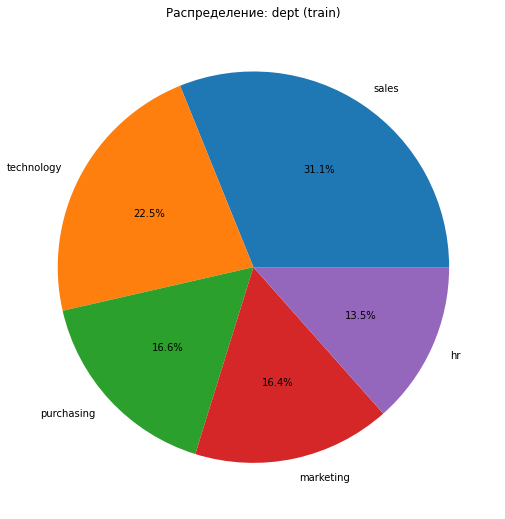

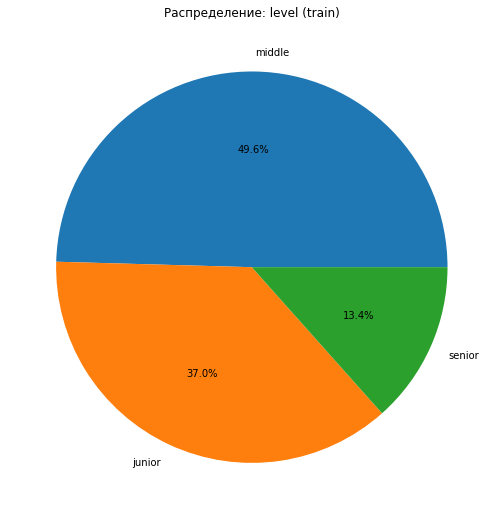

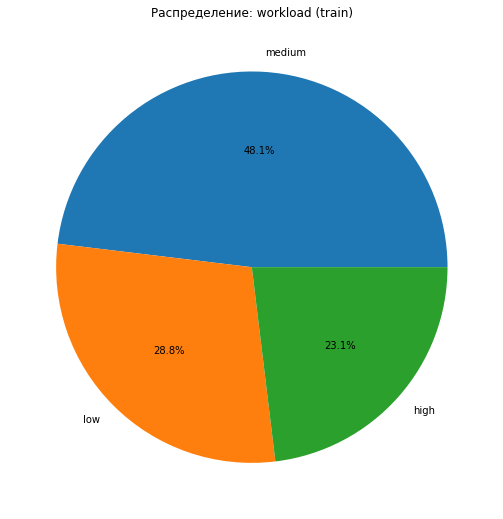

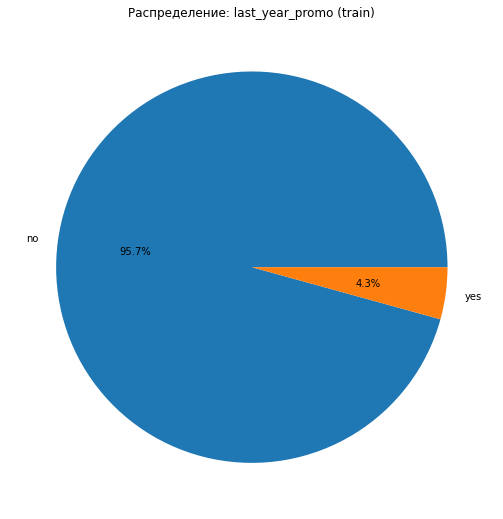

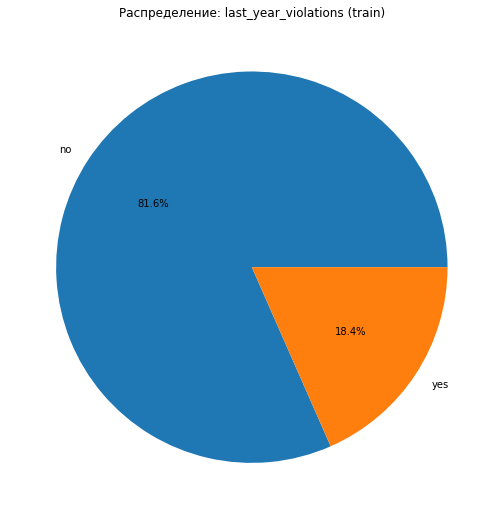

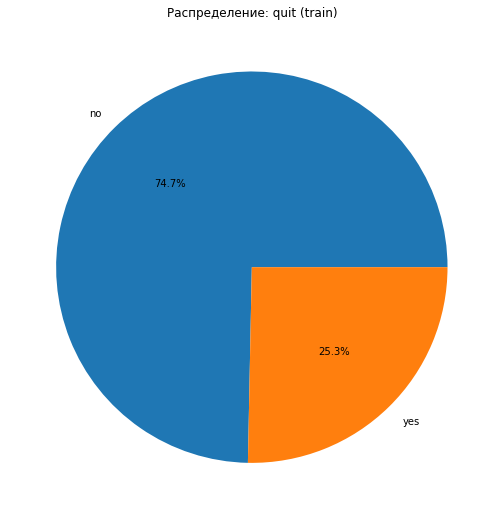

In [80]:
for i in cat_columns:
    plt.figure(figsize=(16, 9))
    train[i].value_counts().plot(kind='pie', autopct='%1.1f%%')
    plt.title(f'Распределение: {i} (train)')
    plt.ylabel('')
    plt.show()

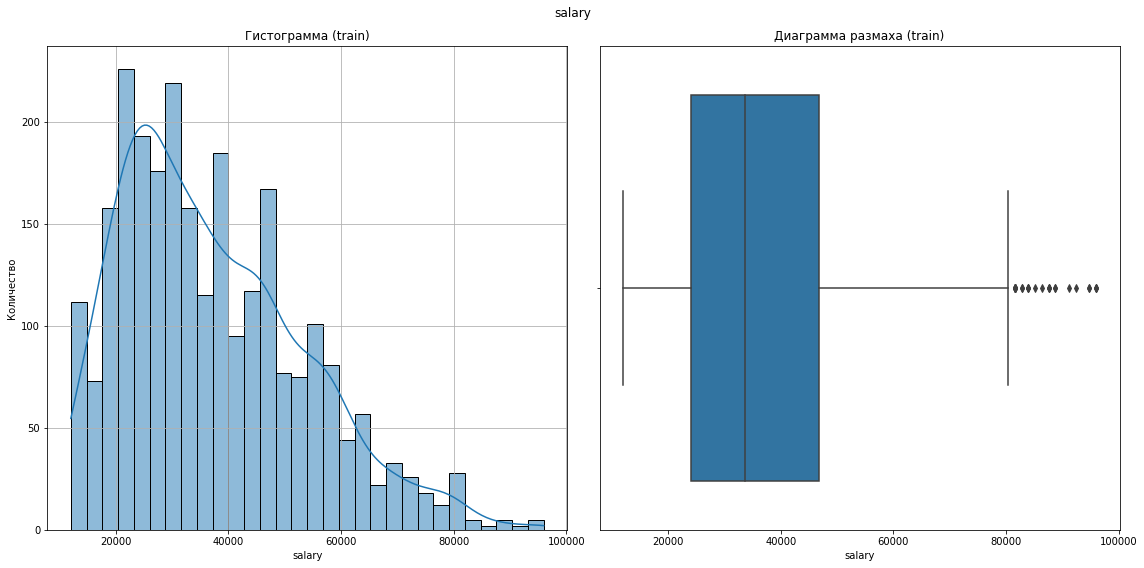

In [81]:
for i in quant_columns:
    fig, axs = plt.subplots(nrows= 1 , ncols= 2, figsize = (16,8))
    sns.histplot(data = train,x = i, ax=axs[0], bins = 30, kde=True)
    axs[0].set_xlabel(i)
    axs[0].set_ylabel('Количество')
    axs[0].set_title('Гистограмма (train)')
    axs[0].grid(True)
    sns.boxplot(data = train,x = i, ax=axs[1])
    axs[1].set_xlabel(i)
    axs[1].set_title('Диаграмма размаха (train)')
    fig.suptitle(i)
    plt.tight_layout()
    plt.show()

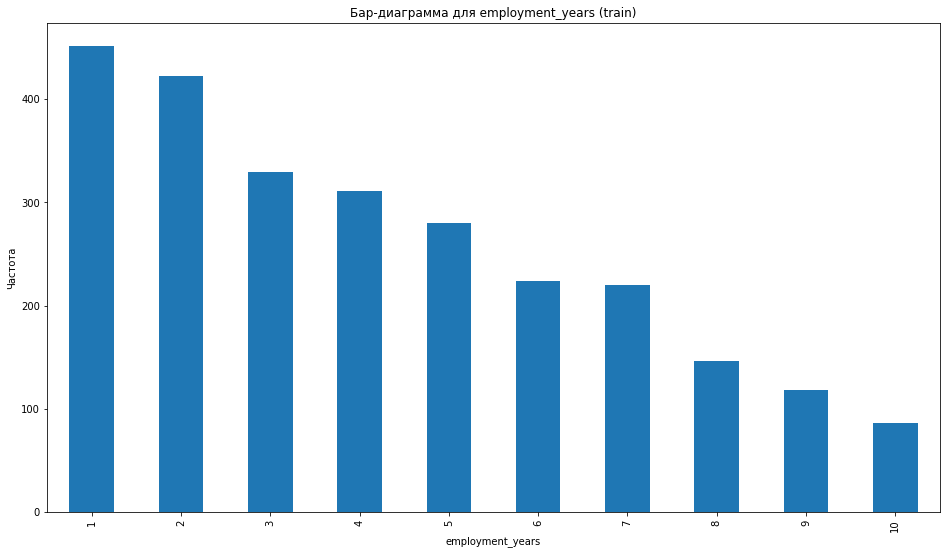

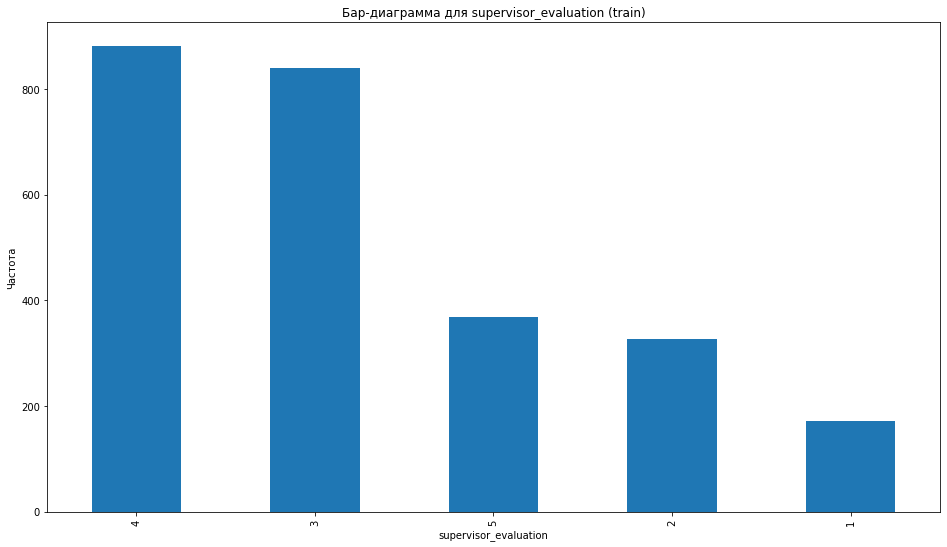

In [82]:
for i in quant:
    train[i].value_counts().plot(kind='bar', title=i, figsize=(16,9))
    plt.title(f'Бар-диаграмма для {i} (train)')
    plt.xlabel(i)
    plt.ylabel('Частота')
    plt.show()

In [83]:
train.phik_matrix(interval_cols=['salary'])\
.style.background_gradient(cmap ='coolwarm').set_precision(4)

,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,quit
dept,1.0000,0.0000,0.0440,0.0000,0.0000,0.0560,0.0346,0.2390,0.0000
level,0.0000,1.0000,0.4141,0.6383,0.1034,0.0425,0.0612,0.7280,0.3385
workload,0.0440,0.4141,1.0000,0.1350,0.0353,0.0000,0.0326,0.7736,0.1207
employment_years,0.0000,0.6383,0.1350,1.0000,0.1478,0.0464,0.0000,0.4287,0.6662
last_year_promo,0.0000,0.1034,0.0353,0.1478,1.0000,0.0529,0.0711,0.1877,0.1798
last_year_violations,0.0560,0.0425,0.0000,0.0464,0.0529,1.0000,0.1673,0.1202,0.2088
supervisor_evaluation,0.0346,0.0612,0.0326,0.0000,0.0711,0.1673,1.0000,0.1216,0.1876
salary,0.2390,0.7280,0.7736,0.4287,0.1877,0.1202,0.1216,1.0000,0.5572
quit,0.0000,0.3385,0.1207,0.6662,0.1798,0.2088,0.1876,0.5572,1.0000


In [84]:
test.head()

,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,quit
id,,,,,,,,,
485046,marketing,junior,medium,2,no,no,5,28800,no
686555,hr,junior,medium,1,no,no,4,30000,no
467458,sales,middle,low,5,no,no,4,19200,no
418655,sales,middle,low,6,no,no,4,19200,no
789145,hr,middle,medium,5,no,no,5,40800,no


In [85]:
test.describe()

,employment_years,supervisor_evaluation,salary
count,2000.000000,2000.000000,2000.000000
mean,3.666500,3.526500,34066.800000
std,2.537222,0.996892,15398.436729
min,1.000000,1.000000,12000.000000
25%,1.000000,3.000000,22800.000000
50%,3.000000,4.000000,30000.000000
75%,6.000000,4.000000,43200.000000
max,10.000000,5.000000,96000.000000


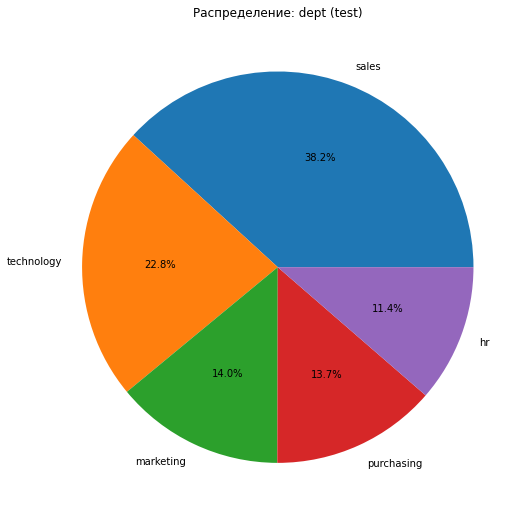

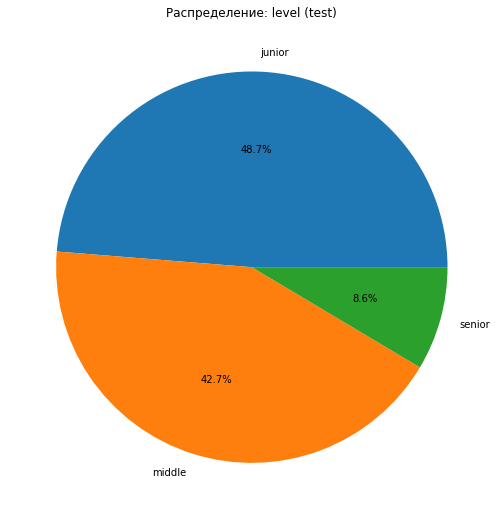

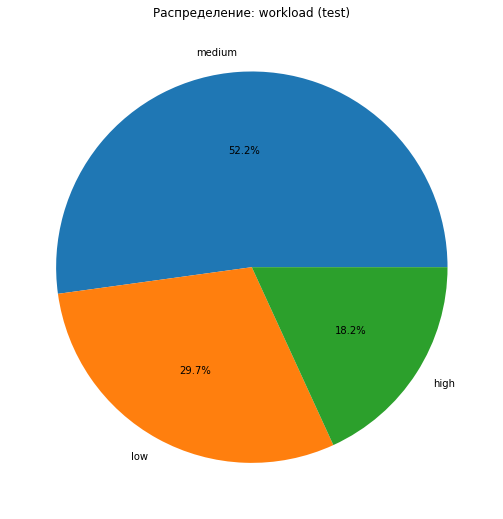

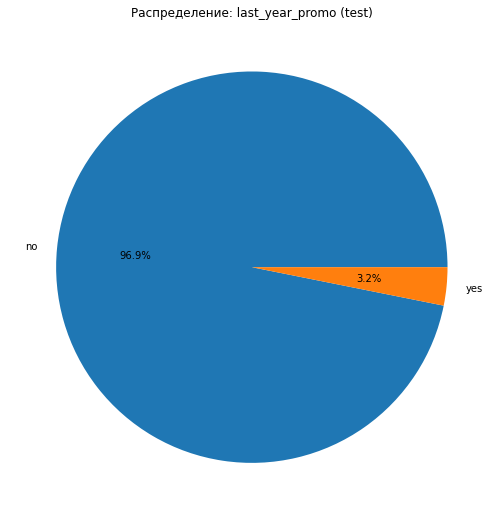

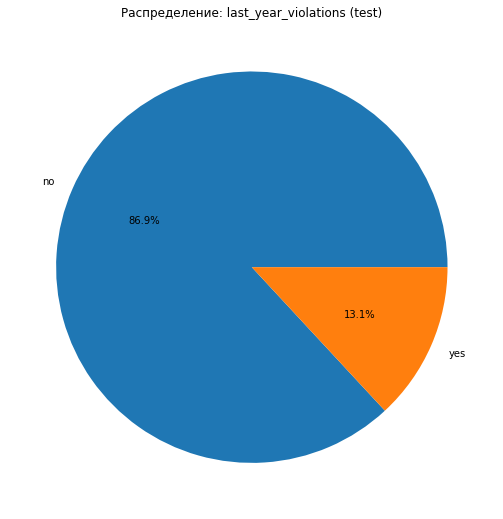

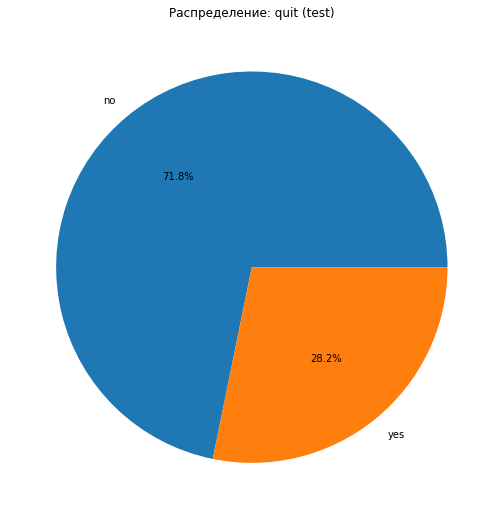

In [86]:
for i in cat_columns:
    plt.figure(figsize=(16, 9))
    test[i].value_counts().plot(kind='pie', autopct='%1.1f%%')
    plt.title(f'Распределение: {i} (test)')
    plt.ylabel('')
    plt.show()

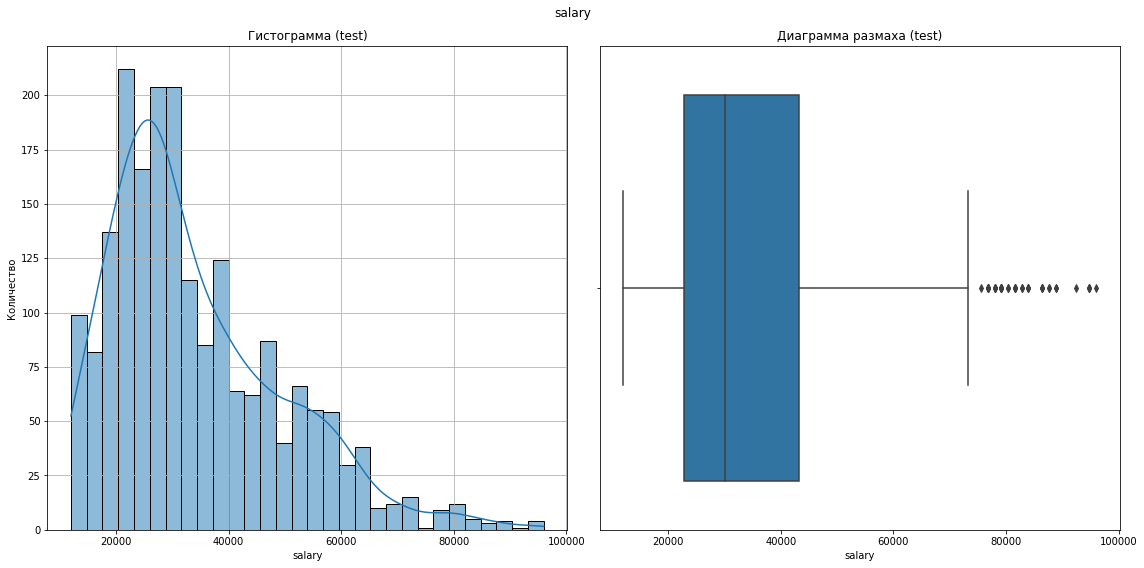

In [87]:
for i in quant_columns:
    fig, axs = plt.subplots(nrows= 1 , ncols= 2, figsize = (16,8))
    sns.histplot(data = test,x = i, ax=axs[0], bins = 30, kde=True)
    axs[0].set_xlabel(i)
    axs[0].set_ylabel('Количество')
    axs[0].set_title('Гистограмма (test)')
    axs[0].grid(True)
    sns.boxplot(data = test,x = i, ax=axs[1])
    axs[1].set_xlabel(i)
    axs[1].set_title('Диаграмма размаха (test)')
    fig.suptitle(i)
    plt.tight_layout()
    plt.show()

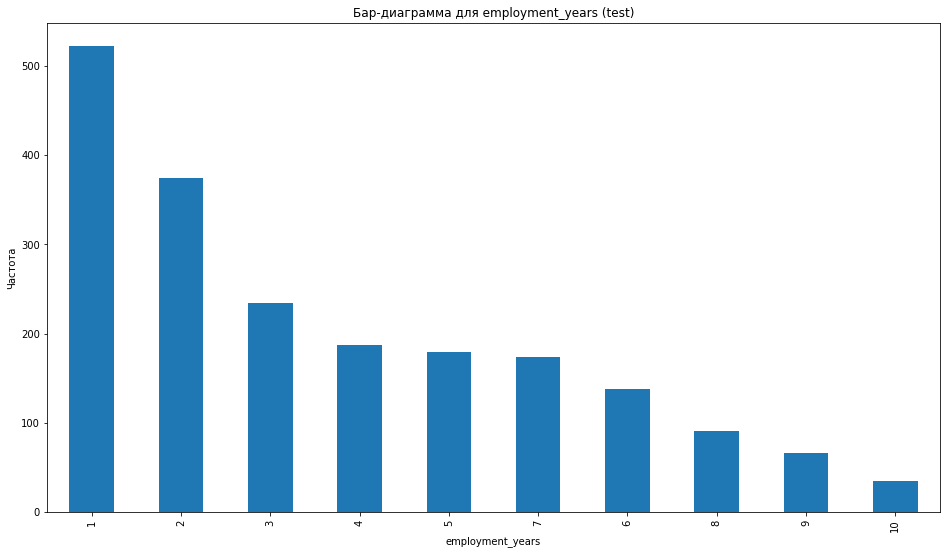

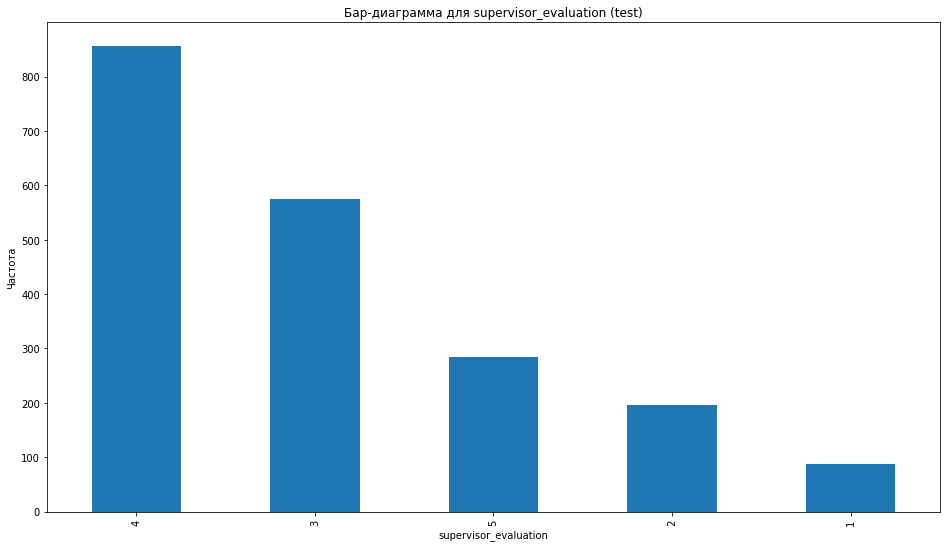

In [88]:
for i in quant:
    test[i].value_counts().plot(kind='bar', title=i, figsize=(16,9))
    plt.title(f'Бар-диаграмма для {i} (test)')
    plt.xlabel(i)
    plt.ylabel('Частота')
    plt.show()

In [89]:
test.phik_matrix(interval_cols=['salary'])\
.style.background_gradient(cmap ='coolwarm').set_precision(4)

,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,quit
dept,1.0000,0.0000,0.0339,0.0000,0.0000,0.0000,0.0609,0.3304,0.0000
level,0.0000,1.0000,0.4742,0.6897,0.1183,0.0175,0.0000,0.7490,0.2936
workload,0.0339,0.4742,1.0000,0.2022,0.0356,0.0000,0.0364,0.7858,0.1022
employment_years,0.0000,0.6897,0.2022,1.0000,0.1736,0.0664,0.0000,0.4947,0.6059
last_year_promo,0.0000,0.1183,0.0356,0.1736,1.0000,0.0000,0.0117,0.1937,0.1378
last_year_violations,0.0000,0.0175,0.0000,0.0664,0.0000,1.0000,0.1897,0.0000,0.1747
supervisor_evaluation,0.0609,0.0000,0.0364,0.0000,0.0117,0.1897,1.0000,0.1146,0.2947
salary,0.3304,0.7490,0.7858,0.4947,0.1937,0.0000,0.1146,1.0000,0.5083
quit,0.0000,0.2936,0.1022,0.6059,0.1378,0.1747,0.2947,0.5083,1.0000


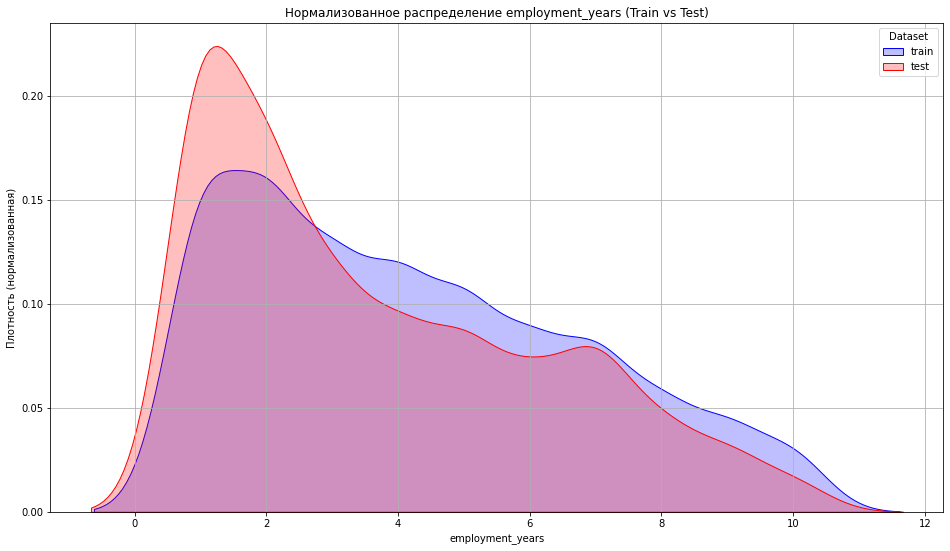

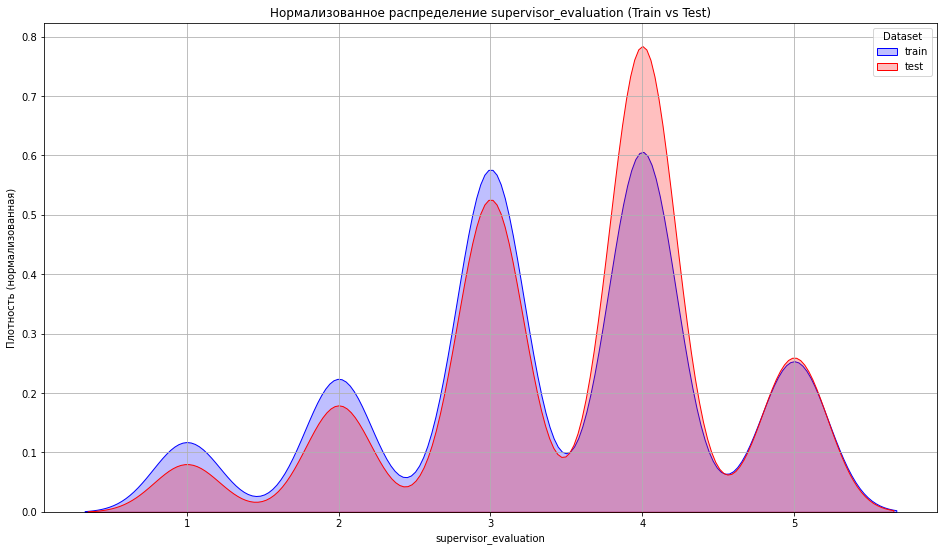

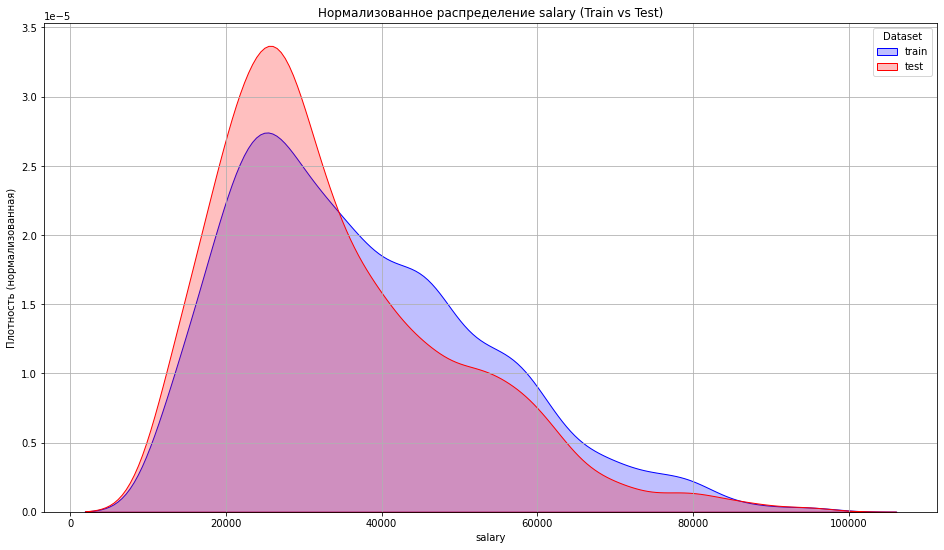

In [90]:
for column in columns_to_plot:
    plt.figure(figsize=(16, 9))  
    sns.kdeplot(train[column], label='train', color='blue', fill=True, common_norm=False)
    sns.kdeplot(test[column], label='test', color='red', fill=True, common_norm=False)
    plt.title(f'Нормализованное распределение {column} (Train vs Test)')
    plt.xlabel(column)
    plt.ylabel('Плотность (нормализованная)')
    plt.legend(title='Dataset')
    plt.grid(True)
    plt.show()

Был проведен исследовательский анализ, данные имеют практически те же характеристики, что и в предыдущей задаче. Выбросов и аномалий, как и мультколлинеарности, не обнаружено. Тренировочная и тестовая выборка имеют схожие распределения.

### Портрет уволившегося сотрудника

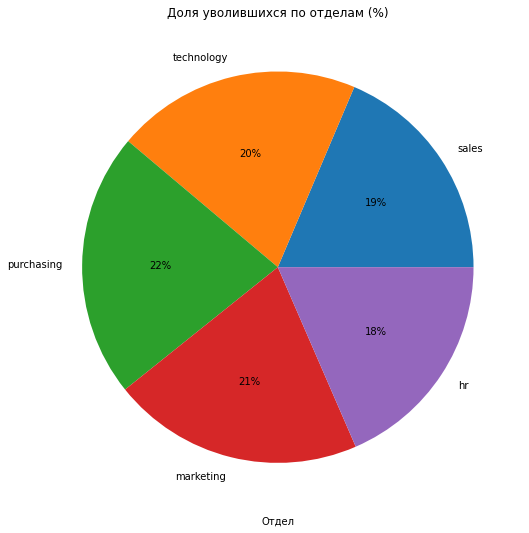

In [91]:
department_size = train['dept'].value_counts()
quit_by_department = train.query('quit == "yes"')['dept'].value_counts()
quit_rate_by_department = (quit_by_department / department_size) * 100
quit_rate_by_department.plot(kind='pie', figsize=(16, 9),autopct='%1.0f%%')
plt.title('Доля уволившихся по отделам (%)')
plt.xlabel('Отдел')
plt.ylabel(' ')
plt.show()

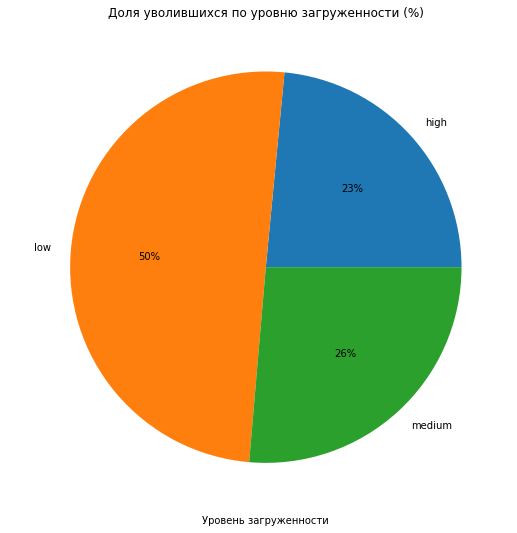

In [92]:
workload_size = train['workload'].value_counts()
quit_by_workload = train.query('quit == "yes"')['workload'].value_counts()
quit_rate_by_workload = (quit_by_workload / workload_size) * 100
quit_rate_by_workload.plot(kind='pie', figsize=(16, 9), autopct='%1.0f%%')
plt.title('Доля уволившихся по уровню загруженности (%)')
plt.xlabel('Уровень загруженности')
plt.ylabel(' ')
plt.show()

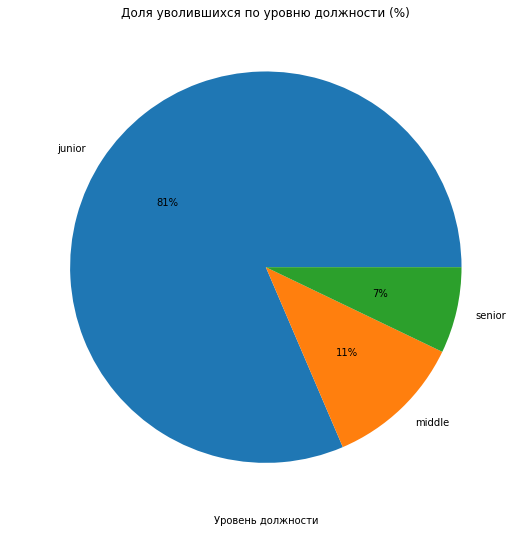

In [93]:
level_size = train['level'].value_counts()
quit_by_level = train.query('quit == "yes"')['level'].value_counts()
quit_rate_by_level = (quit_by_level / level_size) * 100
quit_rate_by_level.plot(kind='pie', figsize=(16, 9), autopct='%1.0f%%')
plt.title('Доля уволившихся по уровню должности (%)')
plt.xlabel('Уровень должности')
plt.ylabel(' ')
plt.show()

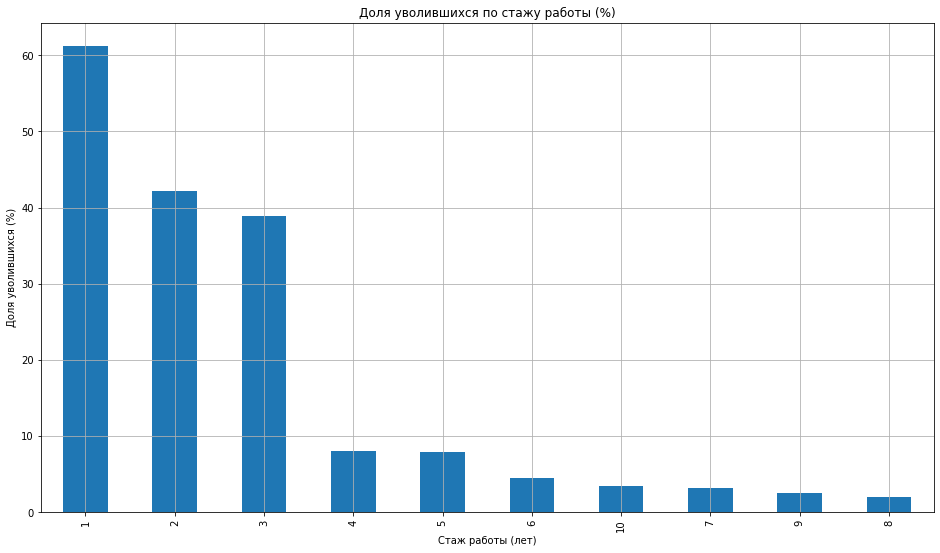

In [94]:
employment_years_size = train['employment_years'].value_counts()
quit_by_employment_years = train.query('quit == "yes"')['employment_years'].value_counts()
quit_rate_by_employment_years = (quit_by_employment_years / employment_years_size) * 100
quit_rate_by_employment_years.sort_values(ascending=False).plot(kind='bar', figsize=(16, 9), grid=True)
plt.title('Доля уволившихся по стажу работы (%)')
plt.xlabel('Стаж работы (лет)')
plt.ylabel('Доля уволившихся (%)')
plt.show()

In [95]:
(train.query('quit=="no"')['salary'].mean() / train.query('quit=="yes"')['salary'].mean()-1)*100

58.92685100748596

Большая доля уволившихся сотрудников из отделов purchasing и marketing. Больше всего уволилось junior-сотрудников(81%). Так же 50% сотрудников с низкой нагрузкой уволилось. Средняя заработная плата уволившихся на 58% ниже, чем у оставшихся сотрудников. Чуть более 60% работающих один год увольняются.

### Сравнение job_satisfaction_rate для ушедших и оставшихся сотрудников

In [96]:
test_new = test.merge(y_test, on='id')

In [97]:
test_new.head()

,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,quit,job_satisfaction_rate
id,,,,,,,,,,
485046,marketing,junior,medium,2,no,no,5,28800,no,0.79
686555,hr,junior,medium,1,no,no,4,30000,no,0.72
467458,sales,middle,low,5,no,no,4,19200,no,0.64
418655,sales,middle,low,6,no,no,4,19200,no,0.60
789145,hr,middle,medium,5,no,no,5,40800,no,0.75


In [98]:
test_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 485046 to 771859
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dept                   1997 non-null   object 
 1   level                  1999 non-null   object 
 2   workload               1999 non-null   object 
 3   employment_years       2000 non-null   int64  
 4   last_year_promo        2000 non-null   object 
 5   last_year_violations   2000 non-null   object 
 6   supervisor_evaluation  2000 non-null   int64  
 7   salary                 2000 non-null   int64  
 8   quit                   2000 non-null   object 
 9   job_satisfaction_rate  2000 non-null   float64
dtypes: float64(1), int64(3), object(6)
memory usage: 171.9+ KB


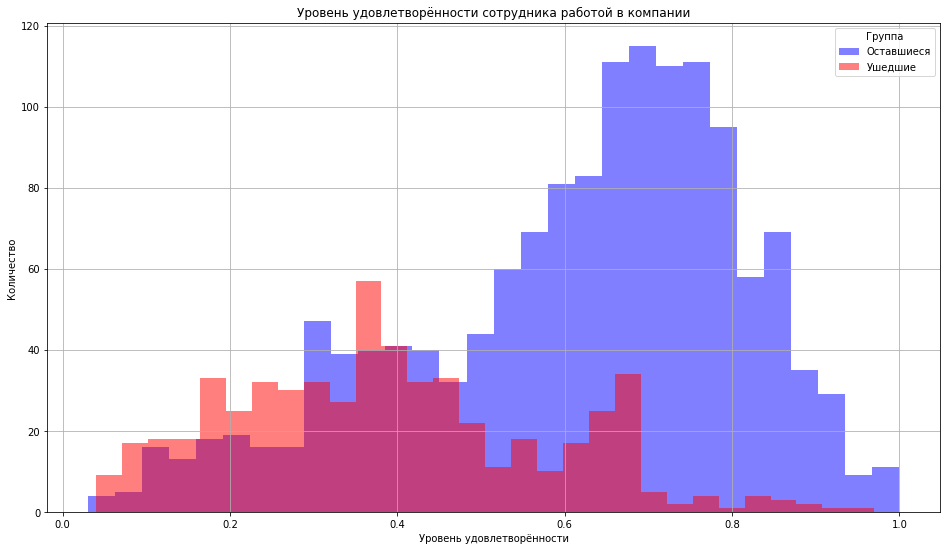

In [99]:
plt.figure(figsize=(16, 9))
plt.hist(test_new.query('quit == "no"')['job_satisfaction_rate'], bins=30, alpha=0.5, label='Оставшиеся', color='blue')
plt.hist(test_new.query('quit == "yes"')['job_satisfaction_rate'], bins=30, alpha=0.5, label='Ушедшие', color='red')
plt.title('Уровень удовлетворённости сотрудника работой в компании')
plt.xlabel('Уровень удовлетворённости')
plt.ylabel('Количество')
plt.legend(title='Группа')
plt.grid(True)
plt.show()

Судя по гистограммам можно сделать вывод, что уровень удовлетворенности действительно влияет уволится сотрудник или нет, у ушедших сотрудников он явно ниже.

## Добавление нового входного признака

In [100]:
train['job_satisfaction_rate'] = randomized_search.predict(train.drop(['quit'], axis = 1))

In [101]:
train.head()

,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,quit,job_satisfaction_rate
id,,,,,,,,,,
723290,sales,middle,high,2,no,no,4,54000,no,0.605000
814010,sales,junior,medium,2,no,no,4,27600,no,0.846364
155091,purchasing,middle,medium,5,no,no,1,37200,no,0.337500
257132,sales,junior,medium,2,no,yes,3,24000,yes,0.350000
910140,marketing,junior,medium,2,no,no,5,25200,no,0.791667


In [102]:
test['job_satisfaction_rate'] = randomized_search.predict(test.drop(['quit'], axis = 1))

In [103]:
test.head()

,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,quit,job_satisfaction_rate
id,,,,,,,,,,
485046,marketing,junior,medium,2,no,no,5,28800,no,0.885000
686555,hr,junior,medium,1,no,no,4,30000,no,0.682222
467458,sales,middle,low,5,no,no,4,19200,no,0.690000
418655,sales,middle,low,6,no,no,4,19200,no,0.713333
789145,hr,middle,medium,5,no,no,5,40800,no,0.812500


В данном этапе был добавлен новый столбец к датафреймам.

## Подготовка данных

In [104]:
ohe_columns = ['dept','last_year_promo',  'last_year_violations']
ord_columns = ['level', 'workload']
num_columns = ['supervisor_evaluation', 'employment_years', 'salary', 'job_satisfaction_rate']
y = train['quit']
X = train.drop(['quit'], axis = 1)

Остальное изменять не надо, пайплайны для подготовки данных уже были написаны при решении предыдущей задачи.

## Обучение модели

In [105]:
param_grid = [
    # словарь для модели DecisionTreeClassifier()
    {
        'models': [DecisionTreeClassifier(random_state=RANDOM_STATE)],
        'models__max_depth': range(7, 30),
        'models__min_samples_leaf': range(15,30),
        'models__min_samples_split': range(2,30),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']
    },
    
    # словарь для модели KNeighborsClassifier() 
    {
        'models': [KNeighborsClassifier()],
        'models__n_neighbors': range(1,20),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']   
    },

    # словарь для модели LogisticRegression()
    {
        'models': [LogisticRegression(
            random_state=RANDOM_STATE, 
            solver='liblinear',
            class_weight='balanced'
        )],
        'models__C': range(1,10),
        'models__penalty': ['l1', 'l2'],
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    },
    
]

In [106]:
%%time
randomized = RandomizedSearchCV(
    pipe_final, 
    param_grid, 
    cv=5,
    scoring='roc_auc',
    n_iter=500,
    random_state=15,
    n_jobs=-1,
    verbose=10
)
randomized.fit(X, y)
print('Лучшая модель и её параметры:\n\n', randomized.best_estimator_)
print ('Метрика лучшей модели на кросс-валидации:', randomized.best_score_)

Fitting 5 folds for each of 500 candidates, totalling 2500 fits
[CV 1/5; 1/500] START models=DecisionTreeClassifier(random_state=42), models__max_depth=9, models__min_samples_leaf=20, models__min_samples_split=23, preprocessor__num=passthrough
[CV 1/5; 1/500] END models=DecisionTreeClassifier(random_state=42), models__max_depth=9, models__min_samples_leaf=20, models__min_samples_split=23, preprocessor__num=passthrough;, score=0.906 total time=   0.0s
[CV 2/5; 1/500] START models=DecisionTreeClassifier(random_state=42), models__max_depth=9, models__min_samples_leaf=20, models__min_samples_split=23, preprocessor__num=passthrough
[CV 2/5; 1/500] END models=DecisionTreeClassifier(random_state=42), models__max_depth=9, models__min_samples_leaf=20, models__min_samples_split=23, preprocessor__num=passthrough;, score=0.896 total time=   0.0s
[CV 3/5; 1/500] START models=DecisionTreeClassifier(random_state=42), models__max_depth=9, models__min_samples_leaf=20, models__min_samples_split=23, prep

In [107]:
pd.set_option('display.max_colwidth', None)
pd.DataFrame(randomized.cv_results_)[
    ['params', 'std_test_score', 'param_models', 'mean_test_score']
].sort_values('mean_test_score', ascending=False).head(3)

,params,std_test_score,param_models,mean_test_score
425,"{'preprocessor__num': 'passthrough', 'models__min_samples_split': 21, 'models__min_samples_leaf': 18, 'models__max_depth': 7, 'models': DecisionTreeClassifier(random_state=42)}",0.009056,DecisionTreeClassifier(random_state=42),0.903601
350,"{'preprocessor__num': 'passthrough', 'models__min_samples_split': 15, 'models__min_samples_leaf': 18, 'models__max_depth': 7, 'models': DecisionTreeClassifier(random_state=42)}",0.009056,DecisionTreeClassifier(random_state=42),0.903601
261,"{'preprocessor__num': 'passthrough', 'models__min_samples_split': 11, 'models__min_samples_leaf': 17, 'models__max_depth': 7, 'models': DecisionTreeClassifier(random_state=42)}",0.008470,DecisionTreeClassifier(random_state=42),0.903439


In [108]:
X_test = test.drop(['quit'], axis=1)
y_test = test['quit']

In [109]:
y_pred = randomized.predict_proba(X_test)[:, 1]

In [110]:
roc_auc_score(y_test, y_pred)

0.9261282818704438

# Промежуточный вывод

На данном шаге были использованы пайплайны. Метрикой была выбрана ROC-AUC. ROC-AUC оценивает качество ранжирования вероятностей, а не просто количество правильно предсказанных классов. На RandomizedSearchCV было проведено 500 итераций с различными гиперпараметрами и среди моделей (DecisionTreeClassifier, KNeighborsClassifier, LogisticRegression) лучшей стала DecisionTreeClassifier с max_depth=7, min_samples_leaf=18, min_samples_split=21, значение ROC-AUC на кросс-валидации 0.9036, что является хорошим результатом. На тестовых же данных модель продемонстрировала значение метрики равное 0.9261, что соответствует критерию успеха задачи(Критерий успеха: ROC-AUC≥0.91 на тестовой выборке).

# Итоговый вывод

В рамках проекта были успешно решены две ключевые задачи, направленные на улучшение HR-аналитики и прогнозирование важных показателей, связанных с удовлетворённостью сотрудников и их оттоком.

Задача 1: Прогнозирование уровня удовлетворённости сотрудников
- Цель задачи: Построить модель, способную предсказать уровень удовлетворённости сотрудников на основе предоставленных данных. Это важно для бизнеса, так как удовлетворённость работой напрямую влияет на отток сотрудников, а своевременное выявление неудовлетворённости позволяет предотвратить внезапные увольнения.
- Метрика: Для оценки модели использовалась метрика SMAPE (Symmetric Mean Absolute Percentage Error), которая учитывает процентные отклонения предсказанных значений от фактических.
- Результаты:
  - Лучшей моделью стала DecisionTreeRegressor с гиперпараметрами: `min_samples_leaf=3`, `min_samples_split=3`, и использованием StandardScaler.
  - Значение SMAPE на кросс-валидации составило 15.26, а на тестовых данных — 13.47, что соответствует критерию успеха (SMAPE < 15).
- Вывод: Модель успешно справилась с задачей прогнозирования уровня удовлетворённости сотрудников и может быть использована для выявления сотрудников, находящихся в группе риска.

Задача 2: Прогнозирование оттока сотрудников
- Цель задачи: Построить модель, способную предсказать увольнение сотрудника. Это важно для бизнеса, так как внезапные увольнения, особенно ключевых сотрудников, несут значительные риски для компании.
- Метрика: Для оценки модели использовалась метрика ROC-AUC, которая оценивает качество ранжирования вероятностей и является одной из наиболее подходящих метрик для задач бинарной классификации.
- Результаты:
  - Лучшей моделью стала DecisionTreeClassifier с гиперпараметрами: `max_depth=7`, `min_samples_leaf=18`, `min_samples_split=21`.
  - Значение ROC-AUC на кросс-валидации составило 0.9036, а на тестовых данных — 0.9261, что соответствует критерию успеха (ROC-AUC ≥ 0.91).
- Вывод: Модель демонстрирует высокое качество предсказания увольнения сотрудников и может быть использована для своевременного принятия мер по удержанию сотрудников.

Обе модели успешно справились с поставленными задачами, продемонстрировав высокое качество предсказаний.